<a href="https://colab.research.google.com/github/AdrianSerbanescu/NLP_Notebooks/blob/main/Data_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data parsing**

In [1]:
# Run in Colab to install and import local packages
!pip install spacy datasets pandas
import pandas as pd
import datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.5 MB/s eta 0:00:00


In [2]:
# Splits the annotations for src, tgt, mt into the types ("upos", "feats", "head", "deprel", "start_char", "end_char", "ner")
def split_annotation(data, type):
  return data[type]

In [3]:
# Load the dataset
data = datasets.load_dataset("GroNLP/divemt", split = "train")
data.to_pandas().head()

# TODO can we already remove some columns to reduce the amount of data? Or do we want to create a new dataset with this info and some extra columns
# Splitting the annotations into "upos", "feats", "head", "deprel", "start_char", "end_char", "ner"
names_src = ["src_upos", "src_feats", "src_head", "src_deprel", "src_start_char", "src_end_char", "src_ner"]
names_tgt = ["tgt_upos", "tgt_feats", "tgt_head", "tgt_deprel", "tgt_start_char", "tgt_end_char", "tgt_ner"]
names_mt = ["mt_upos", "mt_feats", "mt_head", "mt_deprel", "mt_start_char", "mt_end_char", "mt_ner"]
elem = ["upos", "feats", "head", "deprel", "start_char", "end_char", "ner"]
for i in range(len(elem)):
  data = data.map(lambda x: {names_src[i]: split_annotation(x["src_annotations"], elem[i])})
  data = data.map(lambda x: {names_tgt[i]: split_annotation(x["tgt_annotations"], elem[i])})
  data = data.map(lambda x: {names_mt[i]: split_annotation(x["mt_annotations"], elem[i])})

Generating train split: 0 examples [00:00, ? examples/s]

Dataset divemt downloaded and prepared to /root/.cache/huggingface/datasets/GroNLP___divemt/main/1.0.0/c875a08adbd66d5d9c6d8c79f7816092829b41f855641161190c69e19b4f11b1. Subsequent calls will reuse this data.


Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

Map:   0%|          | 0/7740 [00:00<?, ? examples/s]

In [4]:
# Split based on language and task
def split_data_by_language_and_task(data, language):
  data_language = data.filter(lambda line: line["lang_id"] == language)
  data_ht = data_language.filter(lambda line: line["task_type"] == "ht")
  data_pe1 = data_language.filter(lambda line: line["task_type"] == "pe1")
  data_pe2 = data_language.filter(lambda line: line["task_type"] == "pe2")
  return data_ht, data_pe1, data_pe2

In [5]:
# Split the data into 6 parts, 1 per language
# Languages = ["ara", "ita", "nld", "tur", "ukr", "vie"] for Arabic, Italian, Dutch, Turkish, Ukranian and Vietnamese
data_ara_ht, data_ara_pe1, data_ara_pe2 = split_data_by_language_and_task(data, "ara")
data_ita_ht, data_ita_pe1, data_ita_pe2 = split_data_by_language_and_task(data, "ita")
data_nld_ht, data_nld_pe1, data_nld_pe2 = split_data_by_language_and_task(data, "nld")
data_tur_ht, data_tur_pe1, data_tur_pe2 = split_data_by_language_and_task(data, "tur")
data_ukr_ht, data_ukr_pe1, data_ukr_pe2 = split_data_by_language_and_task(data, "ukr")
data_vie_ht, data_vie_pe1, data_vie_pe2 = split_data_by_language_and_task(data, "vie")
data_nld_pe1.to_pandas().head()

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7740 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1290 [00:00<?, ? examples/s]

unit_id  flores_id             item_id subject_id  \
0  flores101-main-nld-11-pe1-1        459  flores101-main-111     nld_t1   
1  flores101-main-nld-11-pe1-2        460  flores101-main-112     nld_t1   
2  flores101-main-nld-11-pe1-3        461  flores101-main-113     nld_t1   
3  flores101-main-nld-11-pe1-4        462  flores101-main-114     nld_t1   
4  flores101-main-nld-11-pe1-5        463  flores101-main-115     nld_t1   

  lang_id  doc_id task_type translation_type  src_len_chr  mt_len_chr  ...  \
0     nld      11       pe1               pe          176       183.0  ...   
1     nld      11       pe1               pe          104       108.0  ...   
2     nld      11       pe1               pe          118       122.0  ...   
3     nld      11       pe1               pe          114       134.0  ...   
4     nld      11       pe1               pe          166       164.0  ...   

                                           mt_deprel  \
0  [nsubj:pass, aux:pass, advmod, root, case, obl...   
1  [det, nsubj, amod, punct, nsubj, det, obj, aux...   
2  [det, nsubj:pass, punct, nsubj, case, det, obl...   
3  [obl, fixed, aux, nsubj, advmod, advmod, xcomp...   
4  [advmod, aux, nsubj, amod, mark, root, mark, d...   

                                      src_start_char  \
0  [0, 9, 13, 20, 31, 34, 42, 49, 54, 62, 66, 68,...   
1  [0, 3, 8, 14, 16, 22, 31, 35, 40, 42, 48, 50, ...   
2  [0, 8, 11, 15, 19, 22, 26, 29, 33, 43, 49, 52,...   
3  [0, 3, 7, 9, 12, 15, 19, 24, 27, 32, 35, 39, 4...   
4  [0, 8, 12, 15, 20, 26, 31, 35, 40, 42, 52, 56,...   

                                      tgt_start_char  \
0  [0, 9, 13, 18, 33, 36, 42, 46, 53, 60, 64, 68,...   
1  [0, 3, 8, 12, 14, 18, 22, 29, 31, 37, 41, 46, ...   
2  [0, 3, 7, 9, 13, 16, 19, 23, 27, 31, 35, 38, 4...   
3  [0, 10, 13, 17, 26, 31, 43, 46, 52, 54, 60, 64...   
4  [0, 3, 6, 12, 19, 22, 27, 31, 34, 41, 43, 49, ...   

                                       mt_start_char  \
0  [0, 9, 13, 18, 33, 36, 42, 46, 53, 60, 64, 68,...   
1  [0, 3, 8, 12, 14, 18, 21, 26, 32, 41, 43, 49, ...   
2  [0, 3, 7, 9, 13, 16, 19, 23, 27, 31, 35, 38, 4...   
3  [0, 3, 9, 12, 16, 25, 30, 42, 45, 51, 53, 59, ...   
4  [0, 3, 6, 12, 19, 22, 27, 31, 34, 41, 43, 49, ...   

                                        src_end_char  \
0  [8, 12, 19, 30, 33, 41, 48, 53, 61, 66, 67, 70...   
1  [2, 7, 14, 15, 21, 30, 34, 40, 41, 47, 49, 54,...   
2  [7, 10, 14, 18, 21, 25, 28, 32, 42, 48, 51, 57...   
3  [2, 7, 8, 11, 14, 18, 23, 26, 31, 34, 38, 43, ...   
4  [7, 11, 14, 19, 25, 30, 34, 40, 41, 51, 55, 61...   

                                        tgt_end_char  \
0  [8, 12, 17, 32, 35, 41, 45, 52, 59, 63, 67, 78...   
1  [2, 7, 12, 13, 17, 21, 29, 30, 36, 40, 45, 54,...   
2  [2, 7, 8, 12, 15, 18, 22, 26, 30, 34, 37, 44, ...   
3  [9, 12, 16, 25, 30, 42, 45, 52, 53, 59, 63, 66...   
4  [2, 5, 11, 18, 21, 26, 30, 33, 41, 42, 48, 54,...   

                                         mt_end_char  \
0  [8, 12, 17, 32, 35, 41, 45, 52, 59, 63, 67, 78...   
1  [2, 7, 12, 13, 17, 20, 25, 31, 41, 42, 48, 52,...   
2  [2, 7, 8, 12, 15, 18, 22, 26, 30, 34, 37, 44, ...   
3  [2, 8, 11, 15, 24, 29, 41, 44, 51, 52, 58, 62,...   
4  [2, 5, 11, 18, 21, 26, 30, 33, 41, 42, 48, 54,...   

                                             src_ner  \
0  [S-PERSON, O, O, O, O, O, O, O, O, O, O, O, O,...   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2  [O, O, O, O, O, S-CARDINAL, O, O, O, O, O, S-G...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   

                                             tgt_ner  \
0  [S-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, S-P...   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   

                                              mt_ner  
0  [S-PER

**Data analysis**

1) Distributions of OK/BAD tags across the target languages

In [6]:
import matplotlib.pyplot as plt

def frequency_histogram_tags(dataset, field_name, language, system):
    # Get the values from the specified field
    column_values = dataset[field_name]
    column_values_flat = sum(column_values, [])
    
    # If the field contains strings, group them into two categories
    if isinstance(column_values_flat[0], str):
        column_values_flat = [1 if x == 'BAD' else 0 for x in column_values_flat]

    # Calculate the frequencies
    ok_count = column_values_flat.count(0)
    bad_count = column_values_flat.count(1)
    total_count = len(column_values_flat)

    # Calculate percentages
    ok_percentage = (ok_count / total_count) * 100
    bad_percentage = (bad_count / total_count) * 100

    # Print the percentages
    print(f'The OK tags percentage for the field {field_name} for {language} with {system} is: {ok_percentage}')
    print(f'The BAD tags percentage for the field {field_name} for {language} with {system} is: {bad_percentage}')

    # Generate the bar graph
    #plt.bar(['OK', 'BAD'], [ok_percentage, bad_percentage], edgecolor='black')
    #plt.xlabel('Tags')
    #plt.ylabel('Percentage')
    #plt.title(f'Distribution of OK/BAD Tags for {language} using {system} (in %)')

    # Add grid
    #plt.grid(axis='y', linestyle='--', alpha=0.7)
    #plt.yticks(range(0, 101, 10))

    #plt.show()

In [7]:
frequency_histogram_tags(data_ara_pe1,'mt_wmt22_qe', 'Arabic', 'Google Translate')
frequency_histogram_tags(data_ara_pe2,'mt_wmt22_qe', 'Arabic', 'mBart')
frequency_histogram_tags(data_ara_pe1,'src_wmt22_qe', 'Arabic', 'Google Translate')
frequency_histogram_tags(data_ara_pe2,'src_wmt22_qe', 'Arabic', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Arabic with Google Translate is: 86.46508279337654
The BAD tags percentage for the field mt_wmt22_qe for Arabic with Google Translate is: 13.53491720662347
The OK tags percentage for the field mt_wmt22_qe for Arabic with mBart is: 67.35698175107649
The BAD tags percentage for the field mt_wmt22_qe for Arabic with mBart is: 32.64301824892352
The OK tags percentage for the field src_wmt22_qe for Arabic with Google Translate is: 89.49583851525877
The BAD tags percentage for the field src_wmt22_qe for Arabic with Google Translate is: 10.504161484741223
The OK tags percentage for the field src_wmt22_qe for Arabic with mBart is: 72.677700181766
The BAD tags percentage for the field src_wmt22_qe for Arabic with mBart is: 27.322299818233997


In [8]:
frequency_histogram_tags(data_ita_pe1,'mt_wmt22_qe', 'Italian', 'Google Translate')
frequency_histogram_tags(data_ita_pe2,'mt_wmt22_qe', 'Italian', 'mBart')
frequency_histogram_tags(data_ita_pe1,'src_wmt22_qe', 'Italian', 'Google Translate')
frequency_histogram_tags(data_ita_pe2,'src_wmt22_qe', 'Italian', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Italian with Google Translate is: 82.46987951807229
The BAD tags percentage for the field mt_wmt22_qe for Italian with Google Translate is: 17.53012048192771
The OK tags percentage for the field mt_wmt22_qe for Italian with mBart is: 74.66701262757309
The BAD tags percentage for the field mt_wmt22_qe for Italian with mBart is: 25.332987372426917
The OK tags percentage for the field src_wmt22_qe for Italian with Google Translate is: 84.9229886157084
The BAD tags percentage for the field src_wmt22_qe for Italian with Google Translate is: 15.077011384291591
The OK tags percentage for the field src_wmt22_qe for Italian with mBart is: 77.8723811346025
The BAD tags percentage for the field src_wmt22_qe for Italian with mBart is: 22.127618865397494


In [9]:
frequency_histogram_tags(data_nld_pe1,'mt_wmt22_qe', 'Dutch', 'Google Translate')
frequency_histogram_tags(data_nld_pe2,'mt_wmt22_qe', 'Dutch', 'mBart')
frequency_histogram_tags(data_nld_pe1,'src_wmt22_qe', 'Dutch', 'Google Translate')
frequency_histogram_tags(data_nld_pe2,'src_wmt22_qe', 'Dutch', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Dutch with Google Translate is: 83.41319572429046
The BAD tags percentage for the field mt_wmt22_qe for Dutch with Google Translate is: 16.586804275709547
The OK tags percentage for the field mt_wmt22_qe for Dutch with mBart is: 73.24462061155153
The BAD tags percentage for the field mt_wmt22_qe for Dutch with mBart is: 26.755379388448468
The OK tags percentage for the field src_wmt22_qe for Dutch with Google Translate is: 86.99894767052521
The BAD tags percentage for the field src_wmt22_qe for Dutch with Google Translate is: 13.00105232947479
The OK tags percentage for the field src_wmt22_qe for Dutch with mBart is: 77.00181766000192
The BAD tags percentage for the field src_wmt22_qe for Dutch with mBart is: 22.998182339998085


In [10]:
frequency_histogram_tags(data_ukr_pe1,'mt_wmt22_qe', 'Ukrainian', 'Google Translate')
frequency_histogram_tags(data_ukr_pe2,'mt_wmt22_qe', 'Ukrainian', 'mBart')
frequency_histogram_tags(data_ukr_pe1,'src_wmt22_qe', 'Ukrainian', 'Google Translate')
frequency_histogram_tags(data_ukr_pe2,'src_wmt22_qe', 'Ukrainian', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Ukrainian with Google Translate is: 62.23641524736415
The BAD tags percentage for the field mt_wmt22_qe for Ukrainian with Google Translate is: 37.76358475263585
The OK tags percentage for the field mt_wmt22_qe for Ukrainian with mBart is: 50.94810379241517
The BAD tags percentage for the field mt_wmt22_qe for Ukrainian with mBart is: 49.05189620758483
The OK tags percentage for the field src_wmt22_qe for Ukrainian with Google Translate is: 67.1577537549029
The BAD tags percentage for the field src_wmt22_qe for Ukrainian with Google Translate is: 32.8422462450971
The OK tags percentage for the field src_wmt22_qe for Ukrainian with mBart is: 57.06495742848943
The BAD tags percentage for the field src_wmt22_qe for Ukrainian with mBart is: 42.93504257151057


In [11]:
frequency_histogram_tags(data_tur_pe1,'mt_wmt22_qe', 'Turkish', 'Google Translate')
frequency_histogram_tags(data_tur_pe2,'mt_wmt22_qe', 'Turkish', 'mBart')
frequency_histogram_tags(data_tur_pe1,'src_wmt22_qe', 'Turkish', 'Google Translate')
frequency_histogram_tags(data_tur_pe2,'src_wmt22_qe', 'Turkish', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Turkish with Google Translate is: 82.87311729803743
The BAD tags percentage for the field mt_wmt22_qe for Turkish with Google Translate is: 17.126882701962572
The OK tags percentage for the field mt_wmt22_qe for Turkish with mBart is: 64.97019715726731
The BAD tags percentage for the field mt_wmt22_qe for Turkish with mBart is: 35.02980284273269
The OK tags percentage for the field src_wmt22_qe for Turkish with Google Translate is: 86.14751745910266
The BAD tags percentage for the field src_wmt22_qe for Turkish with Google Translate is: 13.852482540897352
The OK tags percentage for the field src_wmt22_qe for Turkish with mBart is: 69.84597723141682
The BAD tags percentage for the field src_wmt22_qe for Turkish with mBart is: 30.154022768583182


In [12]:
frequency_histogram_tags(data_vie_pe1,'mt_wmt22_qe', 'Vietnamese', 'Google Translate')
frequency_histogram_tags(data_vie_pe2,'mt_wmt22_qe', 'Vietnamese', 'mBart')
frequency_histogram_tags(data_vie_pe1,'src_wmt22_qe', 'Vietnamese', 'Google Translate')
frequency_histogram_tags(data_vie_pe2,'src_wmt22_qe', 'Vietnamese', 'mBart')

The OK tags percentage for the field mt_wmt22_qe for Vietnamese with Google Translate is: 69.0973950555832
The BAD tags percentage for the field mt_wmt22_qe for Vietnamese with Google Translate is: 30.90260494441679
The OK tags percentage for the field mt_wmt22_qe for Vietnamese with mBart is: 60.491556595886976
The BAD tags percentage for the field mt_wmt22_qe for Vietnamese with mBart is: 39.508443404113024
The OK tags percentage for the field src_wmt22_qe for Vietnamese with Google Translate is: 78.71424471443605
The BAD tags percentage for the field src_wmt22_qe for Vietnamese with Google Translate is: 21.285755285563955
The OK tags percentage for the field src_wmt22_qe for Vietnamese with mBart is: 71.70190375968622
The BAD tags percentage for the field src_wmt22_qe for Vietnamese with mBart is: 28.298096240313786


2) For each language, plot the frequency histograms for the target translation and the machine translation (for both systems) of the following fields:
- POS (Part of speech)
- NER (Named-entity recognition)
- Dependencies


In [13]:
import matplotlib.pyplot as plt

def frequency_histogram_pos(dataset, field_name, language, system):
    # Get the values from the specified field
    column_values = dataset[field_name]
    column_values_flat = sum(column_values, [])

    # Count the frequency of each POS tag
    pos_counts = {tag: column_values_flat.count(tag) for tag in set(column_values_flat)}

    # Sort the POS tags in descending order based on frequency
    sorted_pos_counts = sorted(pos_counts.items(), key=lambda x: x[1], reverse=True)

    # Get the list of POS tags that appear more than 100 times
    pos_ara = [tag for tag, count in sorted_pos_counts if count > 100]

    # Filter the data by the selected POS tags
    filtered_data = [tag for tag in column_values_flat if tag in pos_ara]

    # Generate the histogram with ordered frequencies
    ordered_frequencies = [pos_counts[tag] for tag in pos_ara]
    plt.bar(pos_ara, ordered_frequencies, edgecolor='black')
    plt.xlabel('POS')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of POS using {system} for {language} based on {field_name}')
    plt.xticks(rotation=90)  # set rotation to 90 degrees

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

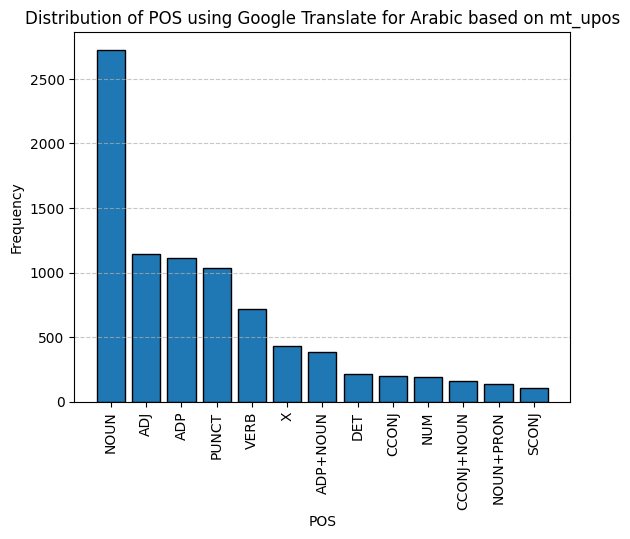

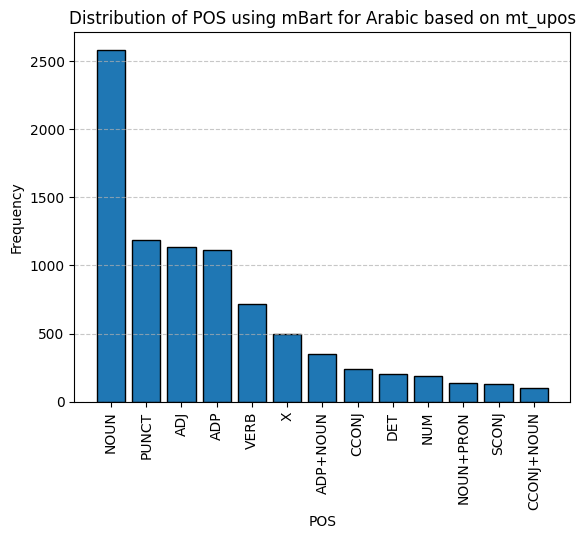

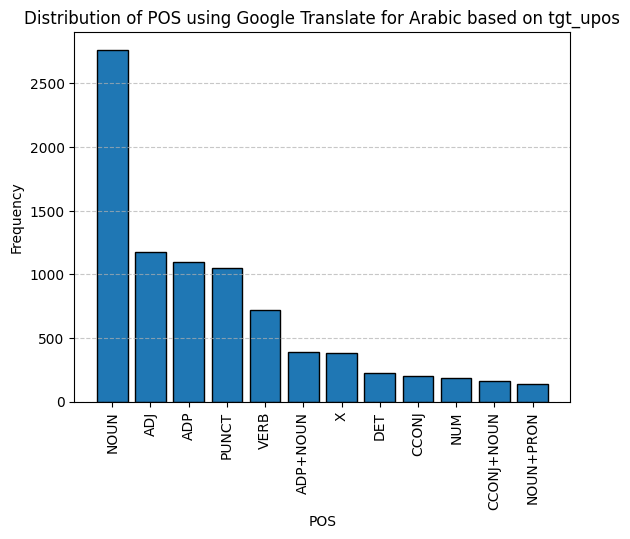

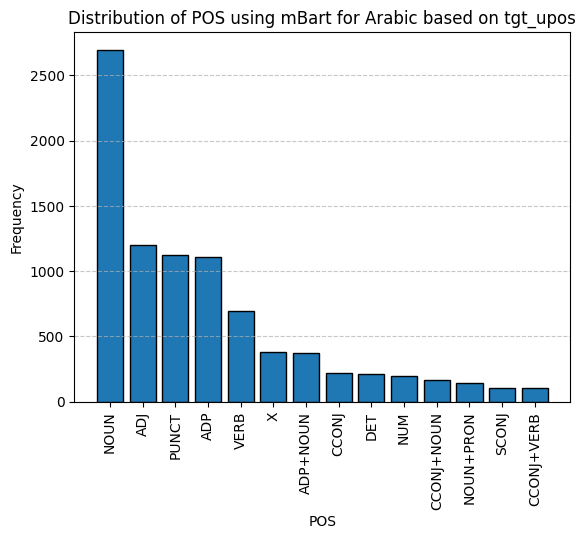

In [14]:
frequency_histogram_pos(data_ara_pe1,'mt_upos', 'Arabic', 'Google Translate')
frequency_histogram_pos(data_ara_pe2,'mt_upos', 'Arabic', 'mBart')
frequency_histogram_pos(data_ara_pe1, 'tgt_upos', 'Arabic', 'Google Translate')
frequency_histogram_pos(data_ara_pe2, 'tgt_upos', 'Arabic', 'mBart')

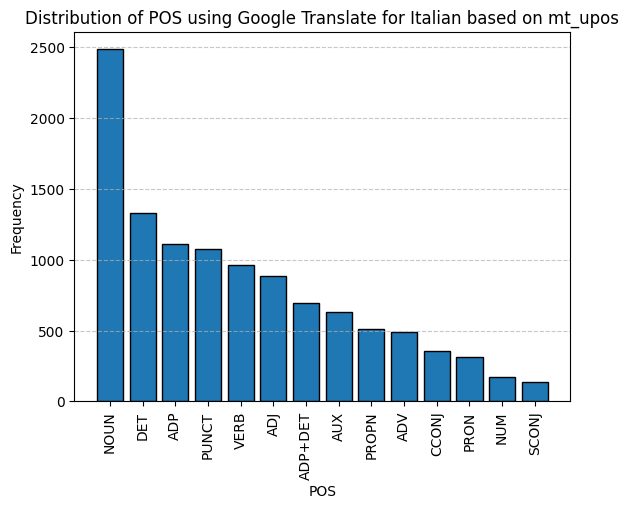

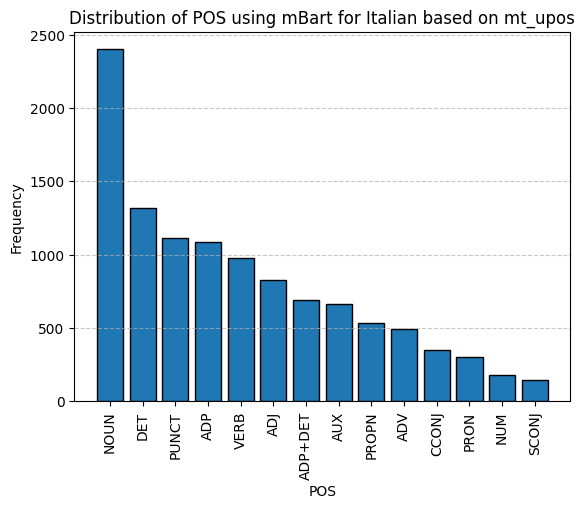

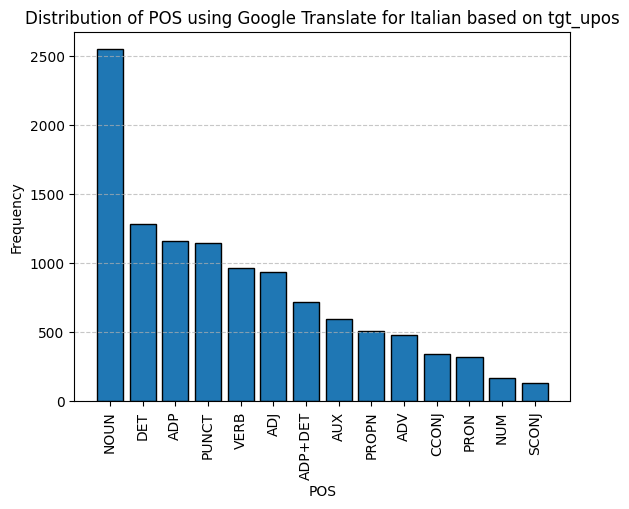

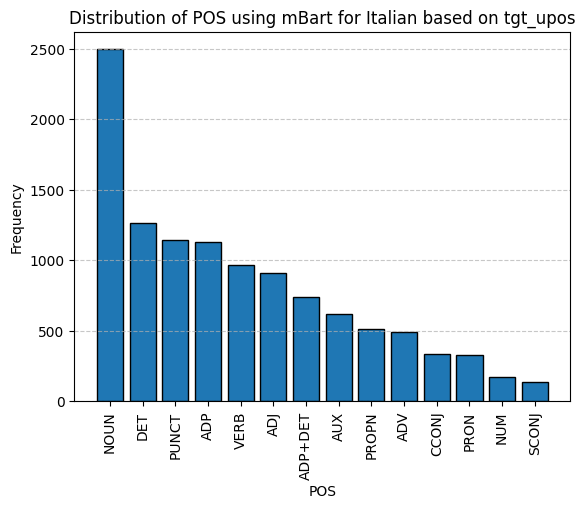

In [15]:
frequency_histogram_pos(data_ita_pe1,'mt_upos', 'Italian', 'Google Translate')
frequency_histogram_pos(data_ita_pe2,'mt_upos', 'Italian', 'mBart')
frequency_histogram_pos(data_ita_pe1, 'tgt_upos', 'Italian', 'Google Translate')
frequency_histogram_pos(data_ita_pe2, 'tgt_upos', 'Italian', 'mBart')

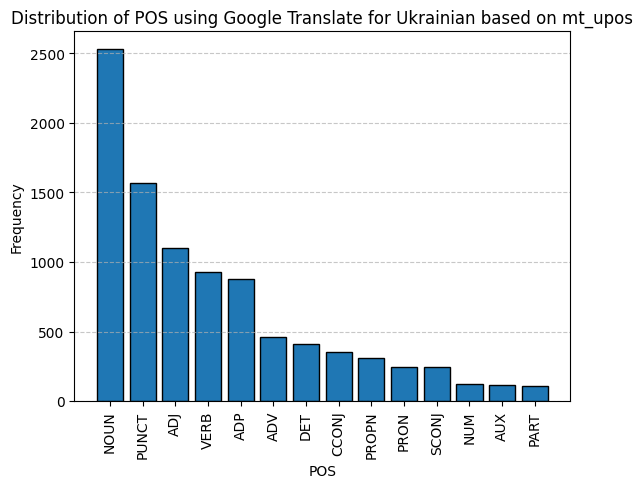

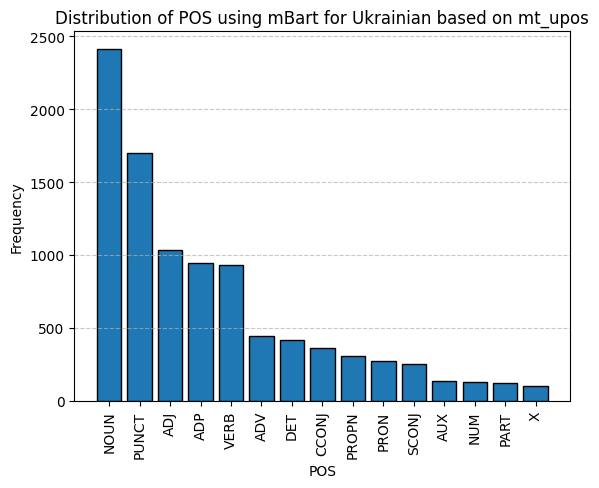

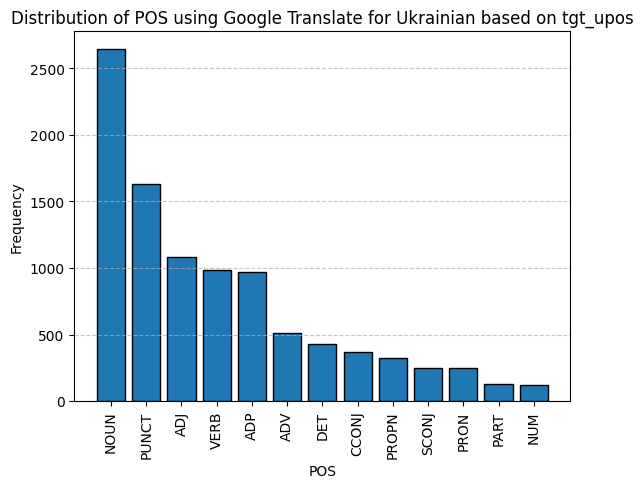

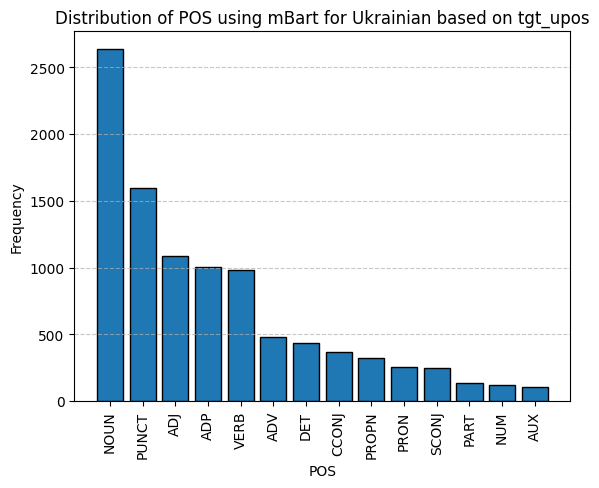

In [16]:
frequency_histogram_pos(data_ukr_pe1,'mt_upos', 'Ukrainian', 'Google Translate')
frequency_histogram_pos(data_ukr_pe2,'mt_upos', 'Ukrainian', 'mBart')
frequency_histogram_pos(data_ukr_pe1, 'tgt_upos', 'Ukrainian', 'Google Translate')
frequency_histogram_pos(data_ukr_pe2, 'tgt_upos', 'Ukrainian', 'mBart')

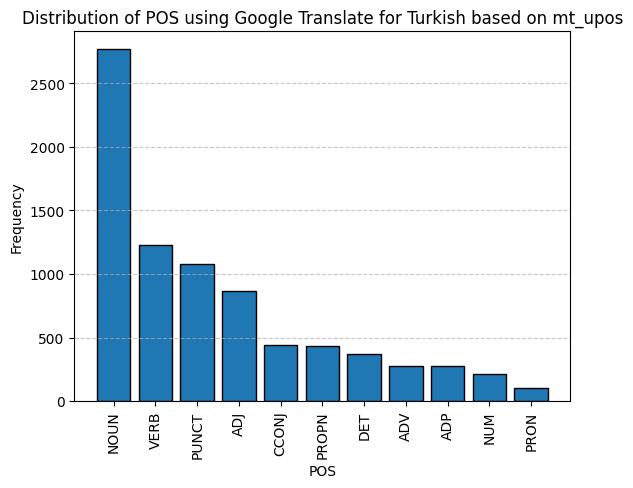

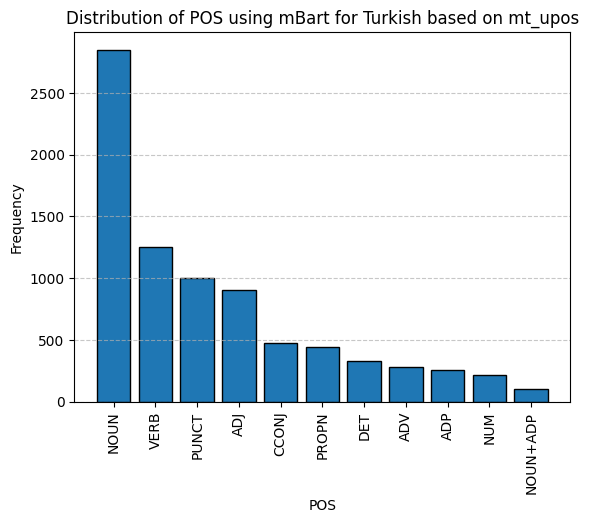

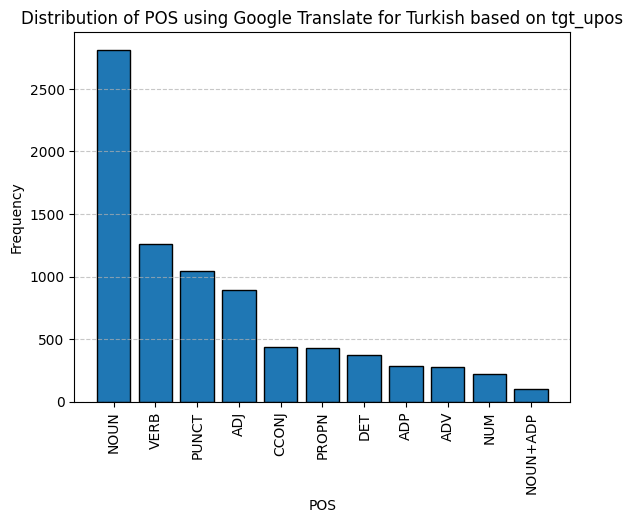

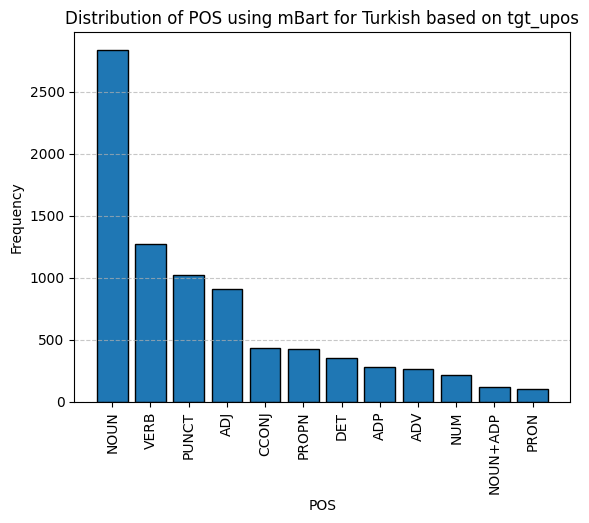

In [17]:
frequency_histogram_pos(data_tur_pe1,'mt_upos', 'Turkish', 'Google Translate')
frequency_histogram_pos(data_tur_pe2,'mt_upos', 'Turkish', 'mBart')
frequency_histogram_pos(data_tur_pe1, 'tgt_upos', 'Turkish', 'Google Translate')
frequency_histogram_pos(data_tur_pe2, 'tgt_upos', 'Turkish', 'mBart')

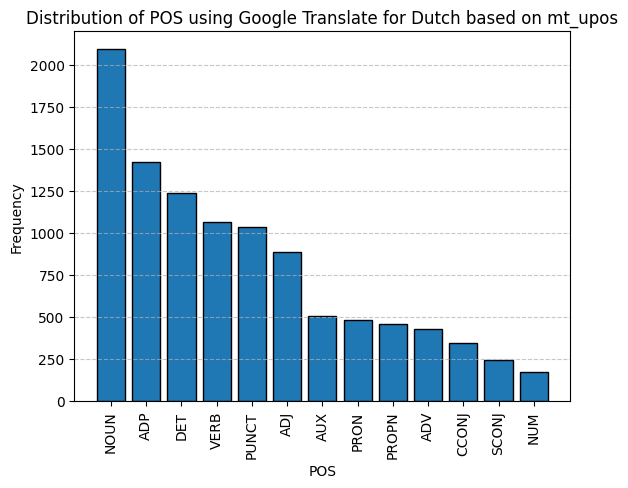

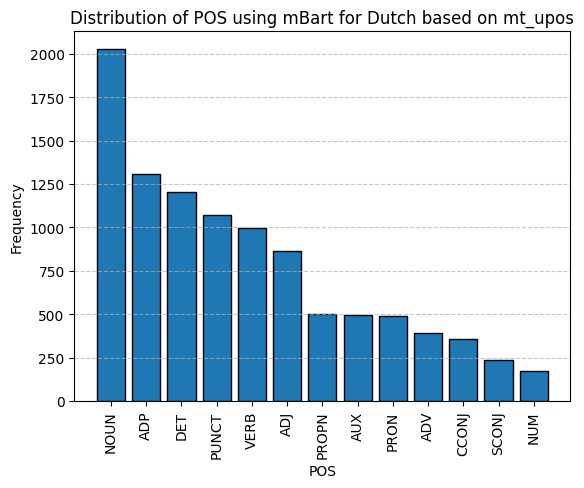

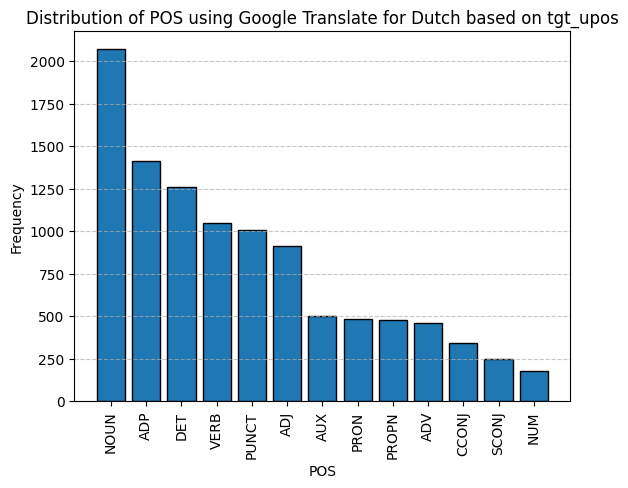

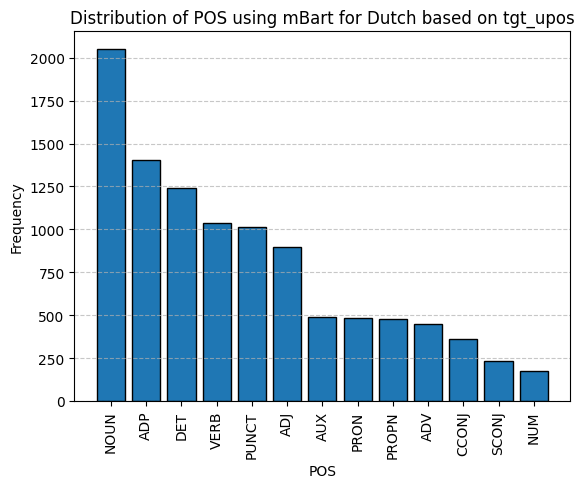

In [18]:
frequency_histogram_pos(data_nld_pe1,'mt_upos', 'Dutch', 'Google Translate')
frequency_histogram_pos(data_nld_pe2,'mt_upos', 'Dutch', 'mBart')
frequency_histogram_pos(data_nld_pe1, 'tgt_upos', 'Dutch', 'Google Translate')
frequency_histogram_pos(data_nld_pe2, 'tgt_upos', 'Dutch', 'mBart')

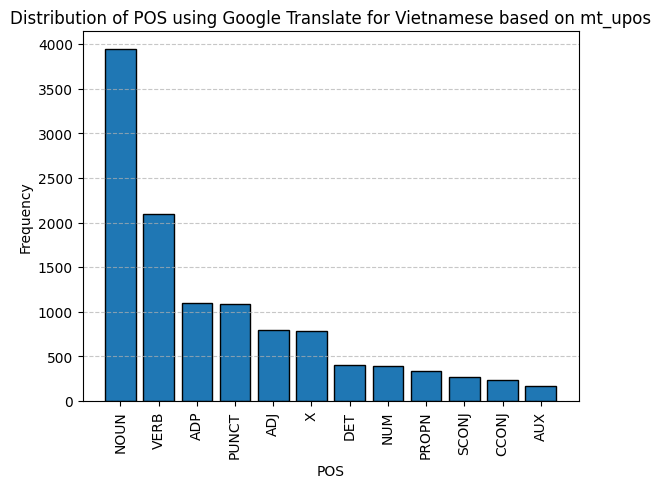

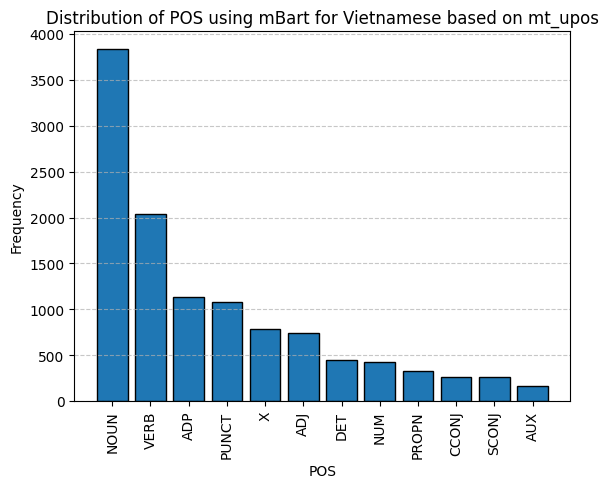

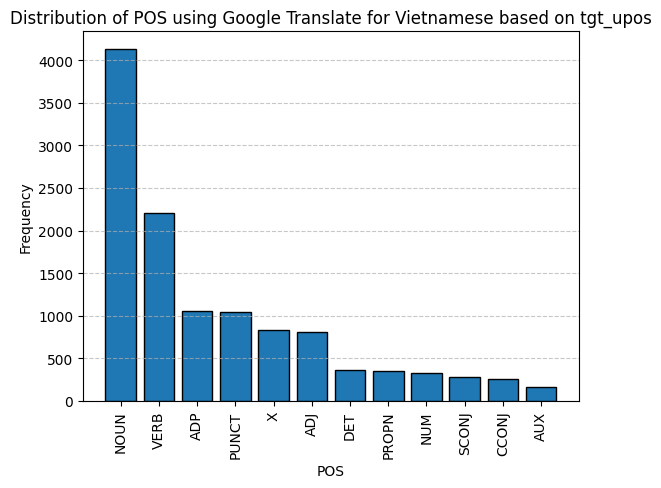

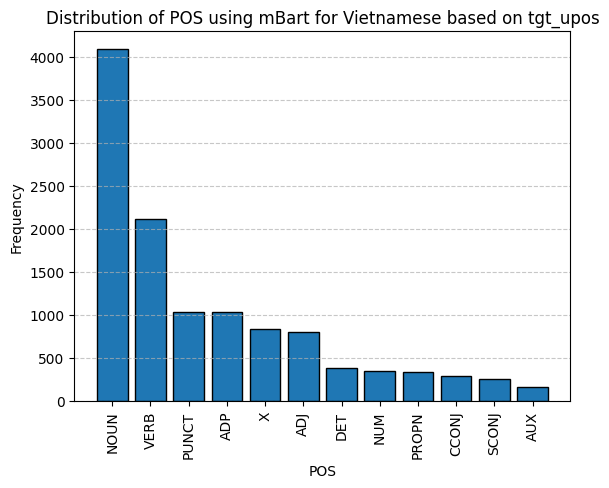

In [19]:
frequency_histogram_pos(data_vie_pe1,'mt_upos', 'Vietnamese', 'Google Translate')
frequency_histogram_pos(data_vie_pe2,'mt_upos', 'Vietnamese', 'mBart')
frequency_histogram_pos(data_vie_pe1, 'tgt_upos', 'Vietnamese', 'Google Translate')
frequency_histogram_pos(data_vie_pe2, 'tgt_upos', 'Vietnamese', 'mBart')

In [20]:
def frequency_histogram_ner(dataset, field_name, language, system):
    # Get the values from the specified field
    column_values = dataset[field_name]
    column_values_flat = sum(column_values, [])

    # Count the frequency of each NER tag
    ner_counts = {tag: column_values_flat.count(tag) for tag in set(column_values_flat)}

    # Remove the 'O' tag from the counts
    if 'O' in ner_counts:
        del ner_counts['O']

    # Sort the NER tags in descending order based on frequency
    sorted_ner_counts = sorted(ner_counts.items(), key=lambda x: x[1], reverse=True)

    # Get the list of NER tags that appear more than 10 time
    ner_ara = [tag for tag, count in sorted_ner_counts if count > 10]

    # Filter the data by the selected NER tags
    filtered_data = [tag for tag in column_values_flat if tag in ner_ara]

    # Generate the histogram with ordered frequencies
    ordered_frequencies = [ner_counts[tag] for tag in ner_ara]
    plt.bar(ner_ara, ordered_frequencies, edgecolor='black')
    plt.xlabel('NER')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of NER using {system} for {language} based on {field_name}')
    plt.xticks(rotation=90)  # set rotation to 90 degrees

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

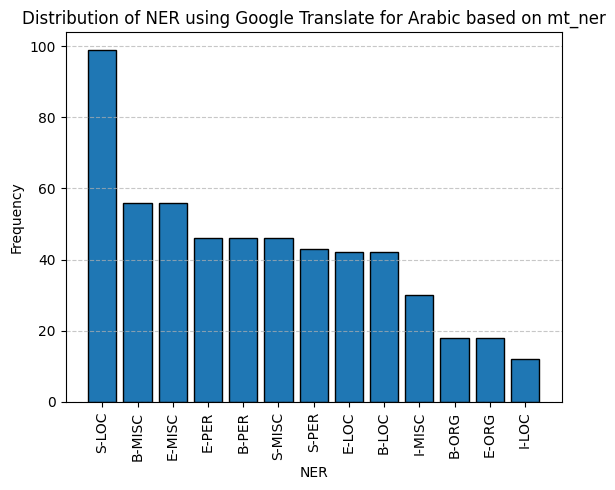

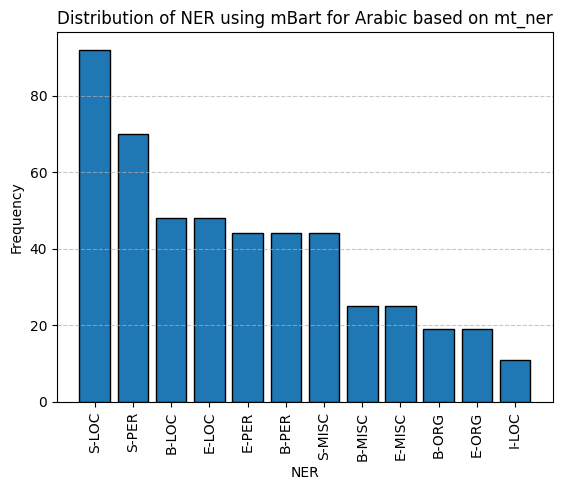

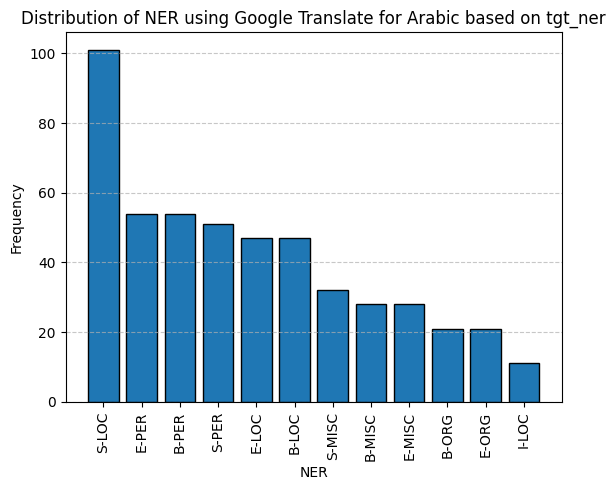

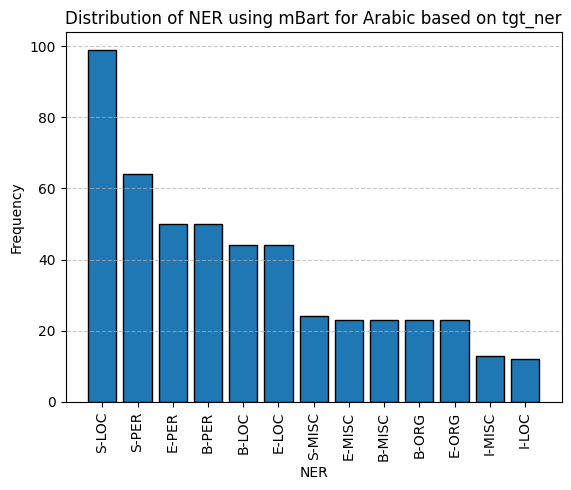

In [21]:
frequency_histogram_ner(data_ara_pe1,'mt_ner', 'Arabic', 'Google Translate')
frequency_histogram_ner(data_ara_pe2,'mt_ner', 'Arabic', 'mBart')
frequency_histogram_ner(data_ara_pe1, 'tgt_ner', 'Arabic', 'Google Translate')
frequency_histogram_ner(data_ara_pe2, 'tgt_ner', 'Arabic', 'mBart')

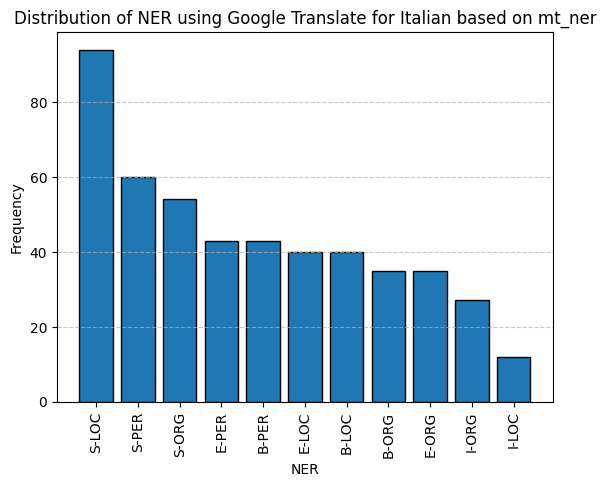

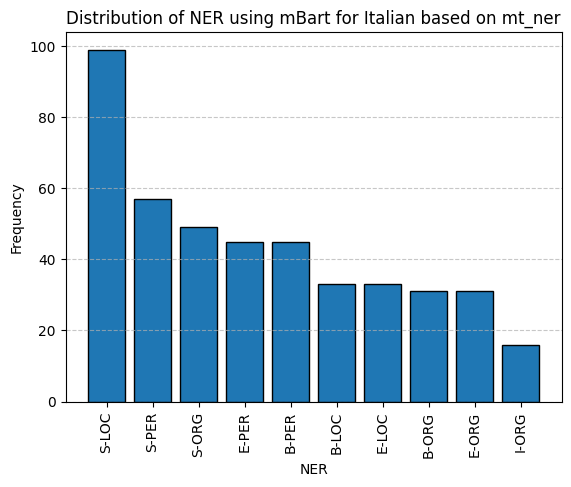

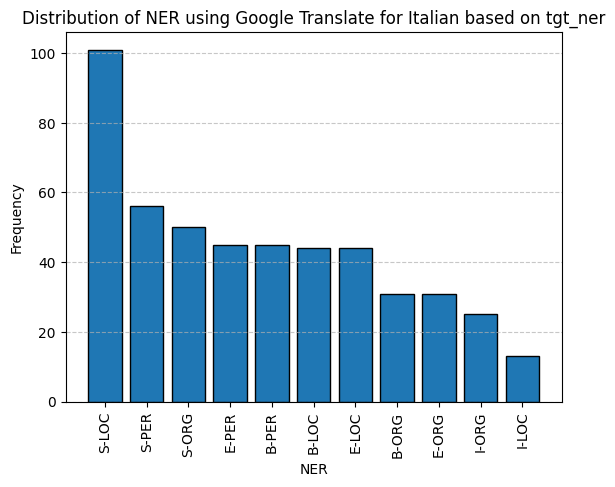

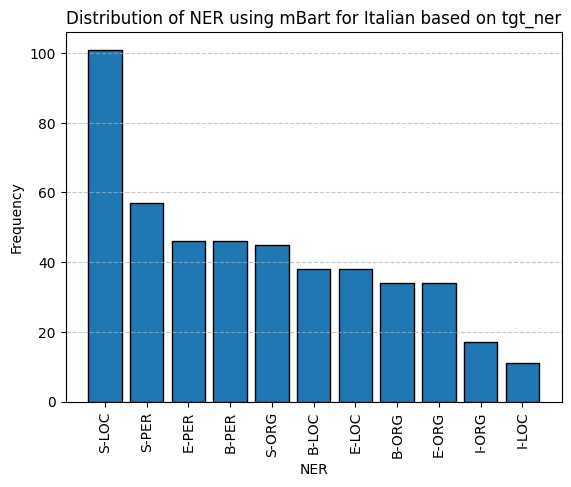

In [22]:
frequency_histogram_ner(data_ita_pe1,'mt_ner', 'Italian', 'Google Translate')
frequency_histogram_ner(data_ita_pe2,'mt_ner', 'Italian', 'mBart')
frequency_histogram_ner(data_ita_pe1, 'tgt_ner', 'Italian', 'Google Translate')
frequency_histogram_ner(data_ita_pe2, 'tgt_ner', 'Italian', 'mBart')

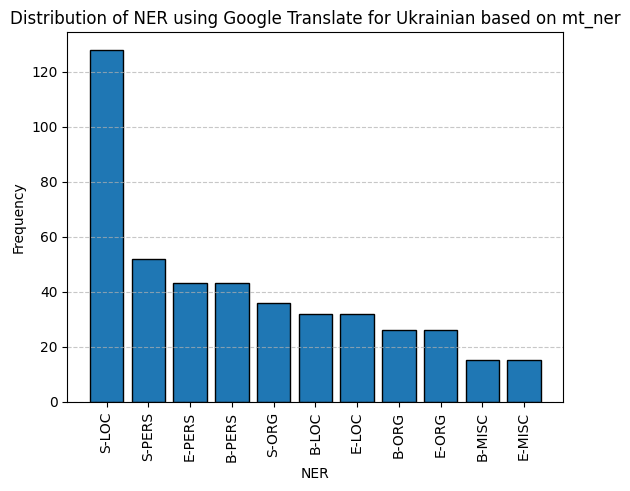

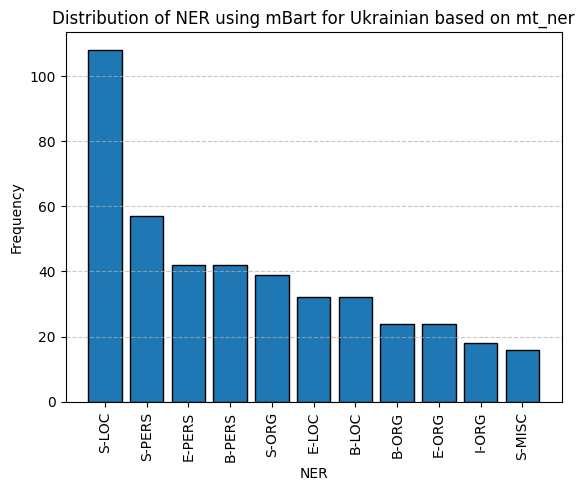

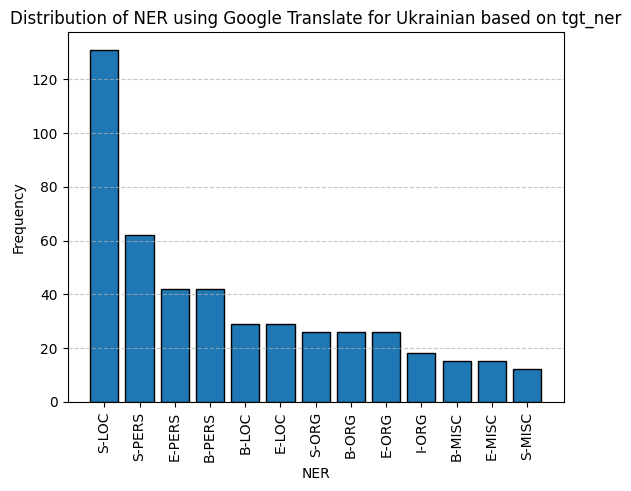

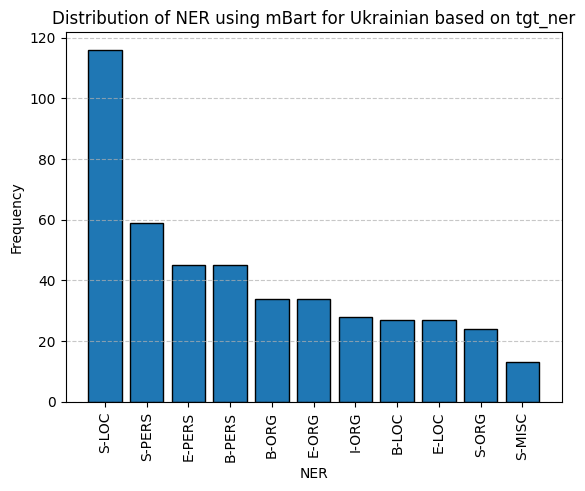

In [23]:
frequency_histogram_ner(data_ukr_pe1,'mt_ner', 'Ukrainian', 'Google Translate')
frequency_histogram_ner(data_ukr_pe2,'mt_ner', 'Ukrainian', 'mBart')
frequency_histogram_ner(data_ukr_pe1, 'tgt_ner', 'Ukrainian', 'Google Translate')
frequency_histogram_ner(data_ukr_pe2, 'tgt_ner', 'Ukrainian', 'mBart')

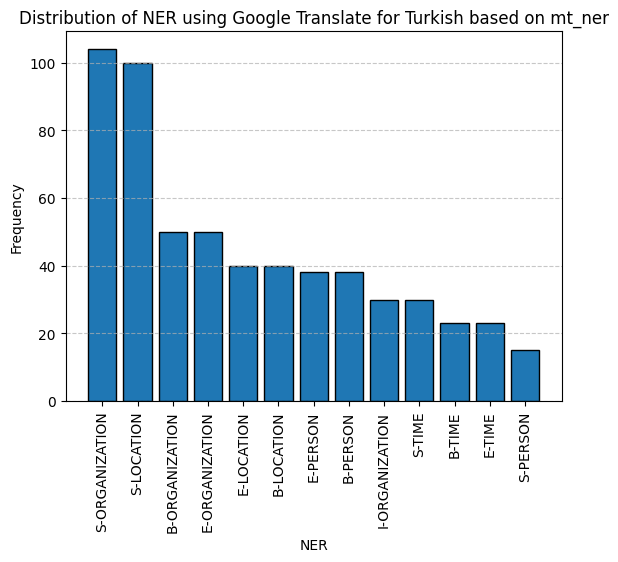

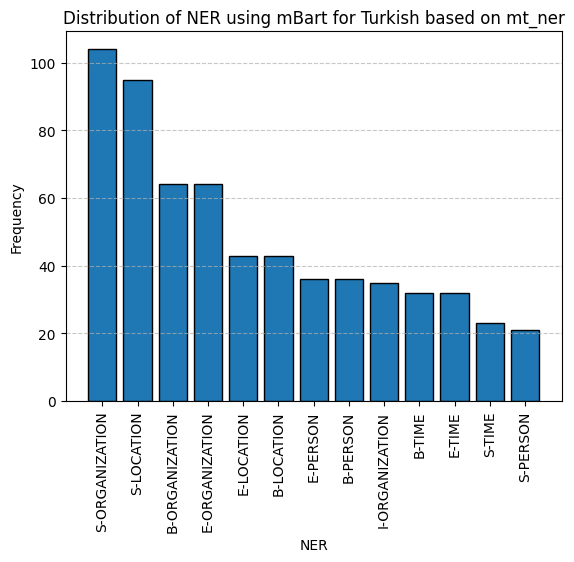

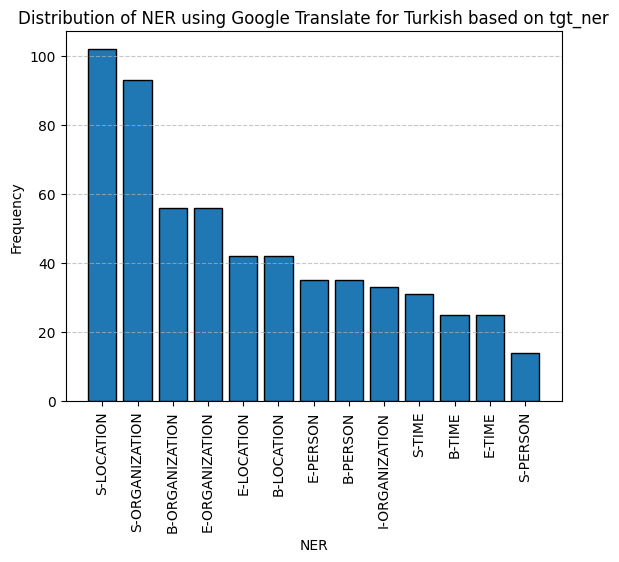

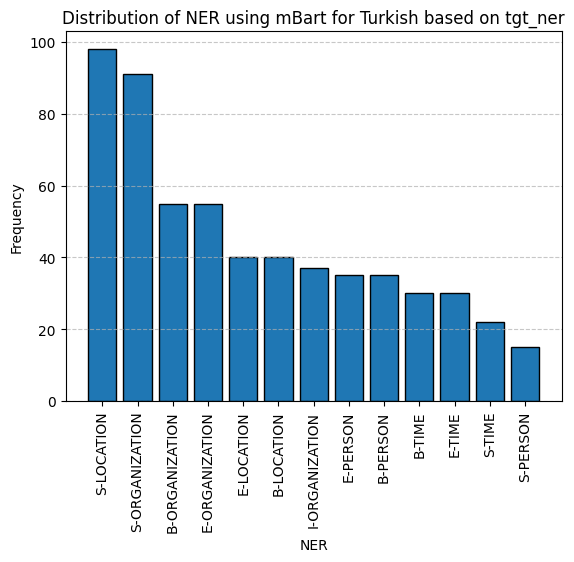

In [24]:
frequency_histogram_ner(data_tur_pe1,'mt_ner', 'Turkish', 'Google Translate')
frequency_histogram_ner(data_tur_pe2,'mt_ner', 'Turkish', 'mBart')
frequency_histogram_ner(data_tur_pe1, 'tgt_ner', 'Turkish', 'Google Translate')
frequency_histogram_ner(data_tur_pe2, 'tgt_ner', 'Turkish', 'mBart')

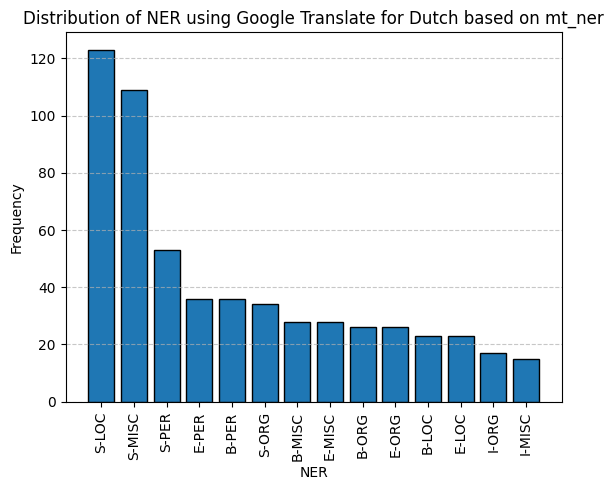

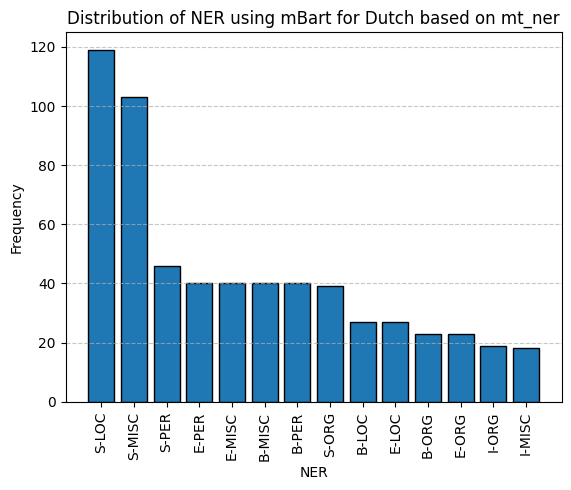

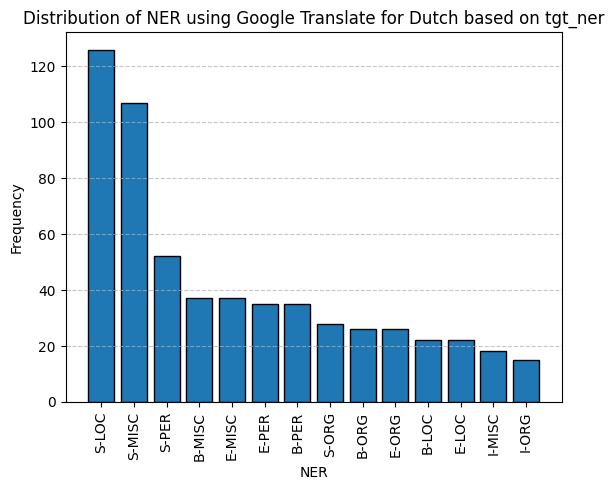

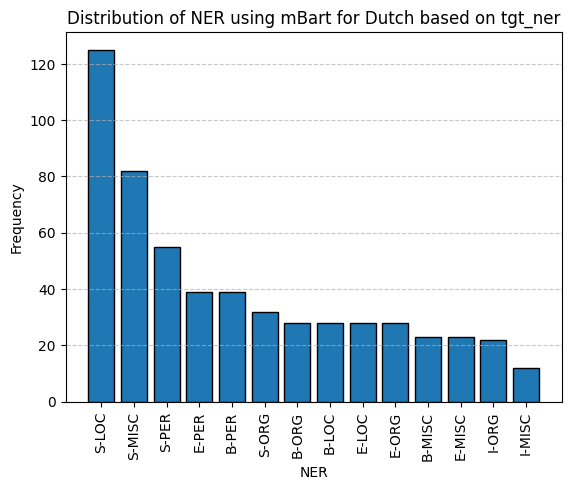

In [25]:
frequency_histogram_ner(data_nld_pe1,'mt_ner', 'Dutch', 'Google Translate')
frequency_histogram_ner(data_nld_pe2,'mt_ner', 'Dutch', 'mBart')
frequency_histogram_ner(data_nld_pe1, 'tgt_ner', 'Dutch', 'Google Translate')
frequency_histogram_ner(data_nld_pe2, 'tgt_ner', 'Dutch', 'mBart')

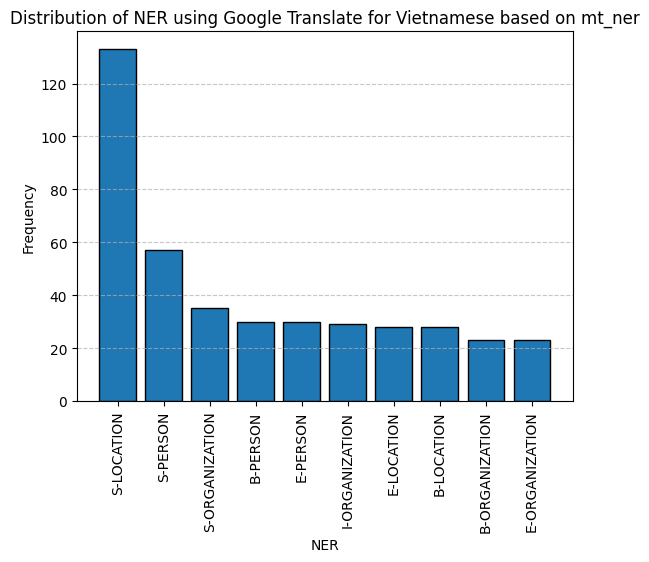

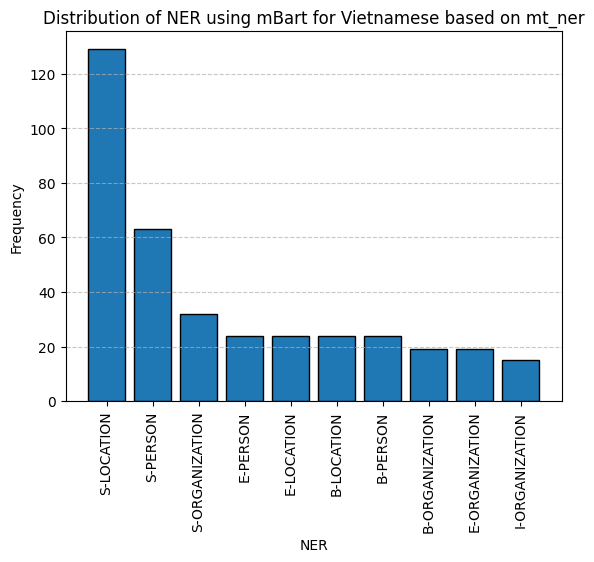

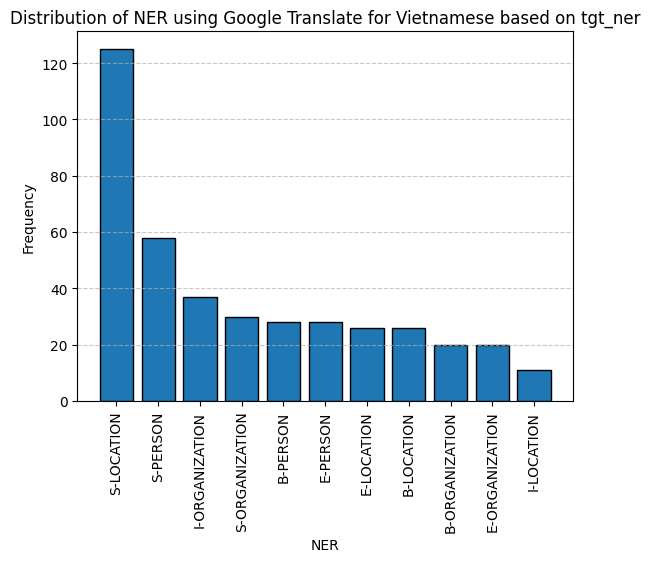

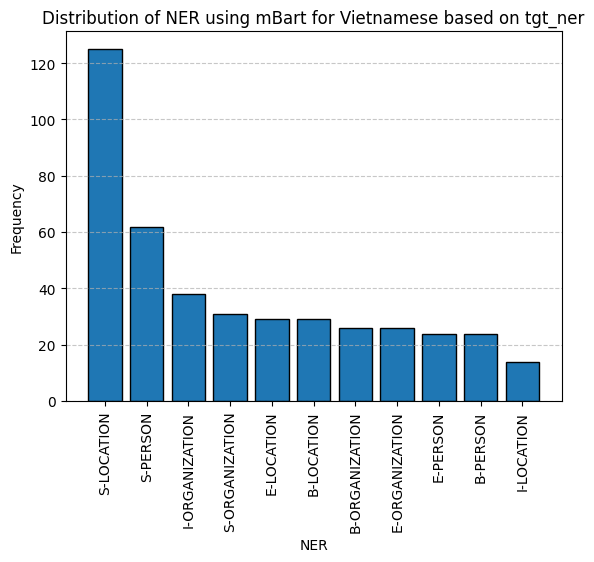

In [26]:
frequency_histogram_ner(data_vie_pe1,'mt_ner', 'Vietnamese', 'Google Translate')
frequency_histogram_ner(data_vie_pe2,'mt_ner', 'Vietnamese', 'mBart')
frequency_histogram_ner(data_vie_pe1, 'tgt_ner', 'Vietnamese', 'Google Translate')
frequency_histogram_ner(data_vie_pe2, 'tgt_ner', 'Vietnamese', 'mBart')

In [27]:
def frequency_histogram_deprel(dataset, field_name, language, system):
    # Get the values from the specified field
    column_values = dataset[field_name]
    column_values_flat = sum(column_values, [])

    # Count the frequency of each dependecy tag
    dep_counts = {tag: column_values_flat.count(tag) for tag in set(column_values_flat)}

    # Sort the Dependency tags in descending order based on frequency
    sorted_dep_counts = sorted(dep_counts.items(), key=lambda x: x[1], reverse=True)

    # Get the list of Dependency tags that appear more than 50 time
    dep_ara = [tag for tag, count in sorted_dep_counts if count > 50]

    # Filter the data by the selected Dependency tags
    filtered_data = [tag for tag in column_values_flat if tag in dep_ara]

    # Generate the histogram with ordered frequencies
    ordered_frequencies = [dep_counts[tag] for tag in dep_ara]
    plt.bar(dep_ara, ordered_frequencies, edgecolor='black')
    plt.xlabel('Dependency')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Dependencies using {system} for {language} based on {field_name}')
    plt.xticks(rotation=90)  # set rotation to 90 degrees

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

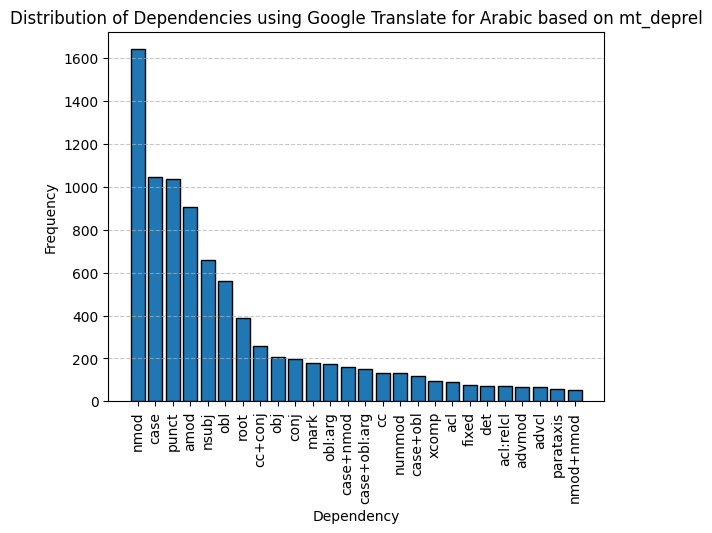

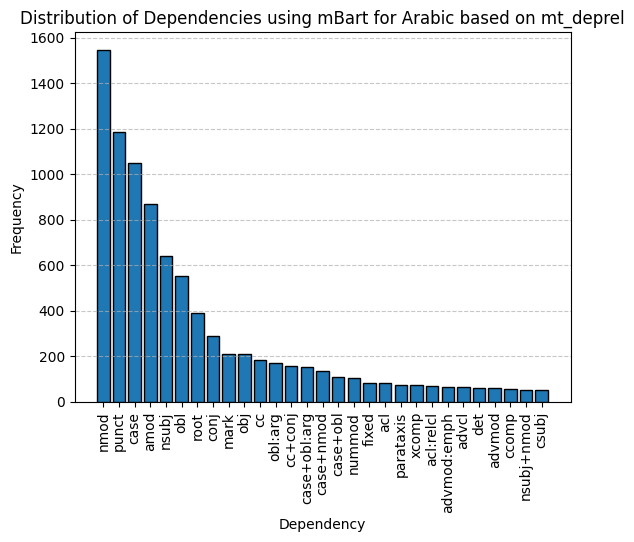

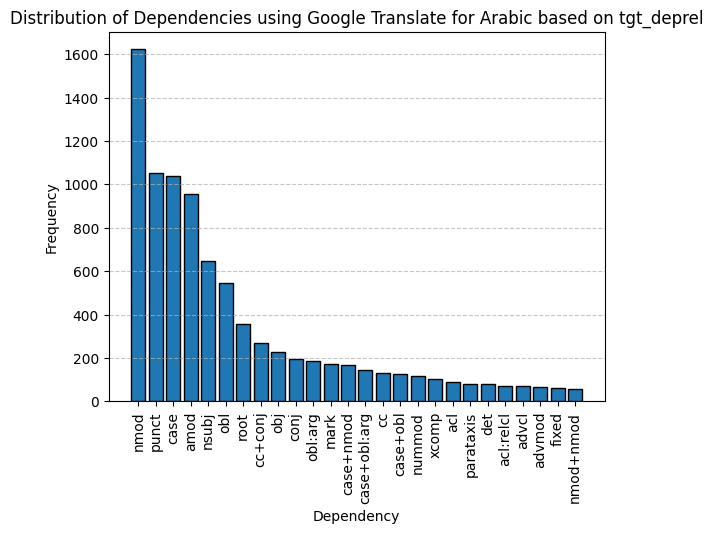

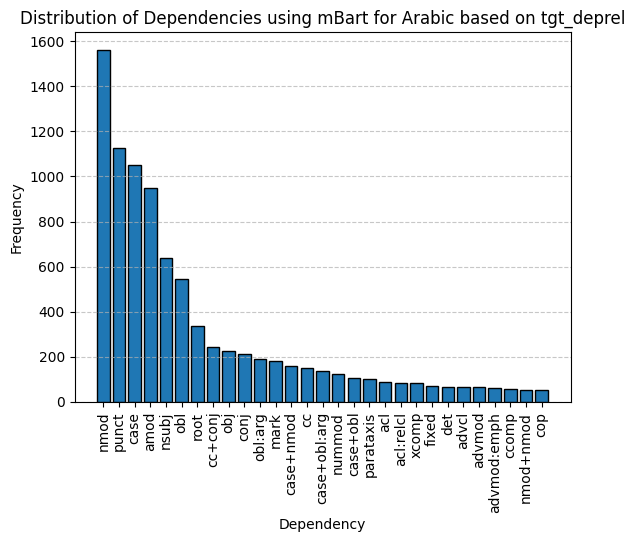

In [28]:
frequency_histogram_deprel(data_ara_pe1,'mt_deprel', 'Arabic', 'Google Translate')
frequency_histogram_deprel(data_ara_pe2,'mt_deprel', 'Arabic', 'mBart')
frequency_histogram_deprel(data_ara_pe1, 'tgt_deprel', 'Arabic', 'Google Translate')
frequency_histogram_deprel(data_ara_pe2, 'tgt_deprel', 'Arabic', 'mBart')

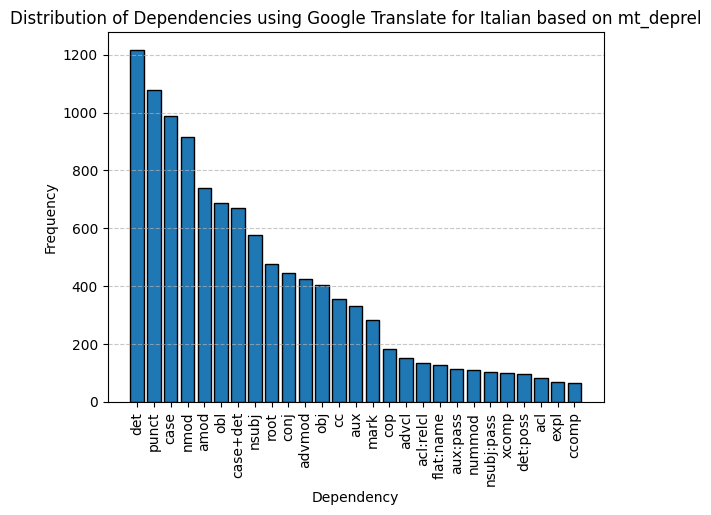

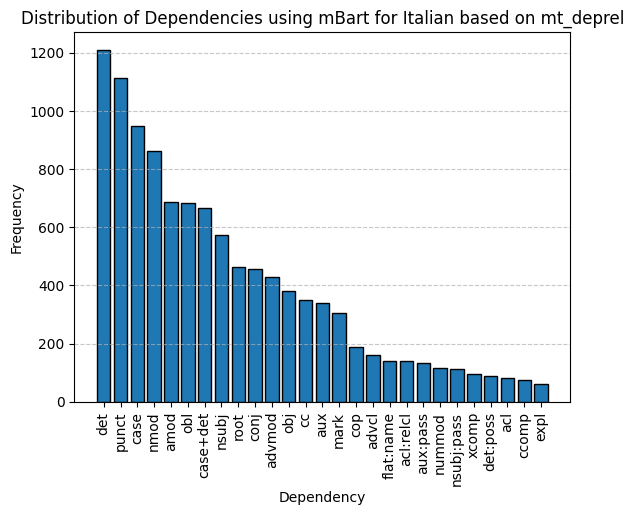

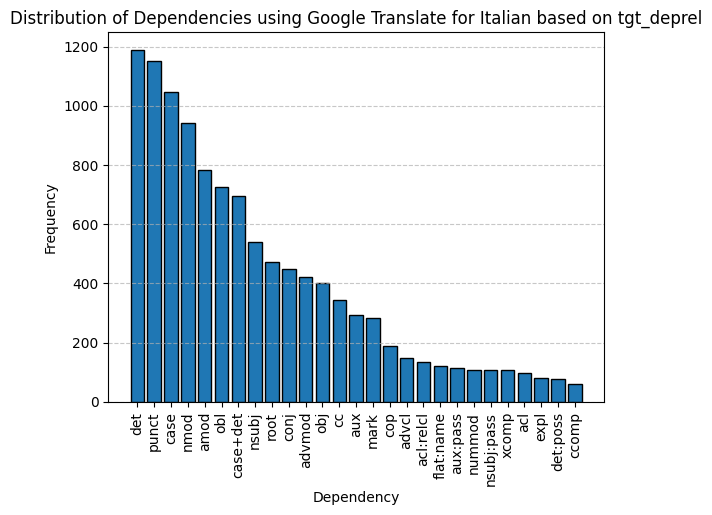

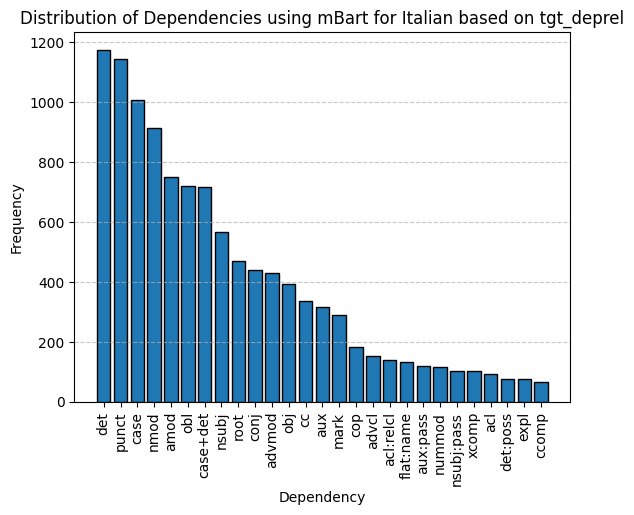

In [29]:
frequency_histogram_deprel(data_ita_pe1,'mt_deprel', 'Italian', 'Google Translate')
frequency_histogram_deprel(data_ita_pe2,'mt_deprel', 'Italian', 'mBart')
frequency_histogram_deprel(data_ita_pe1, 'tgt_deprel', 'Italian', 'Google Translate')
frequency_histogram_deprel(data_ita_pe2, 'tgt_deprel', 'Italian', 'mBart')

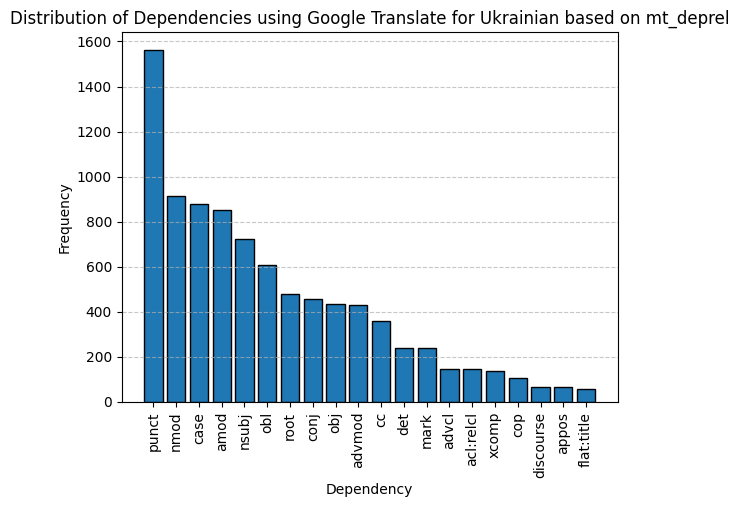

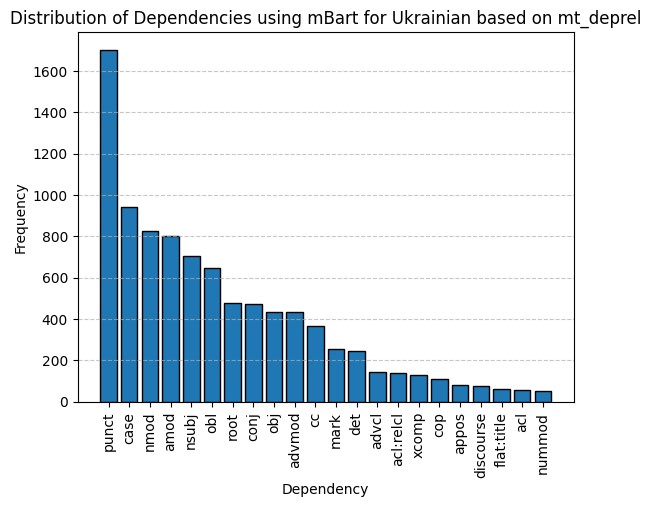

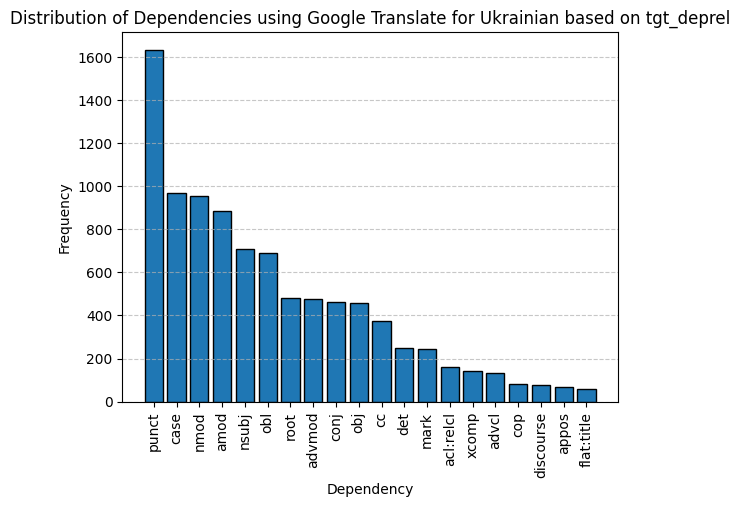

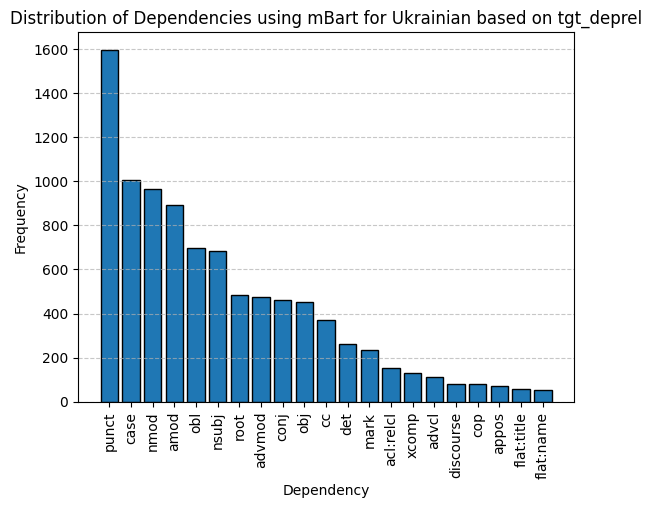

In [30]:
frequency_histogram_deprel(data_ukr_pe1,'mt_deprel', 'Ukrainian', 'Google Translate')
frequency_histogram_deprel(data_ukr_pe2,'mt_deprel', 'Ukrainian', 'mBart')
frequency_histogram_deprel(data_ukr_pe1, 'tgt_deprel', 'Ukrainian', 'Google Translate')
frequency_histogram_deprel(data_ukr_pe2, 'tgt_deprel', 'Ukrainian', 'mBart')

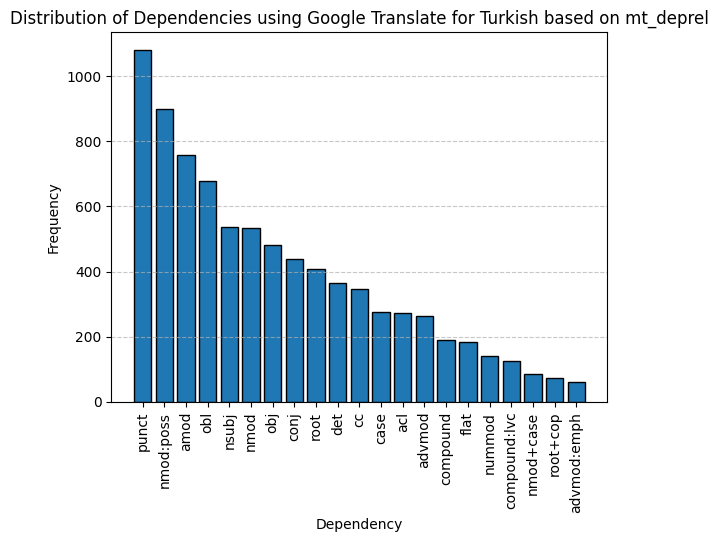

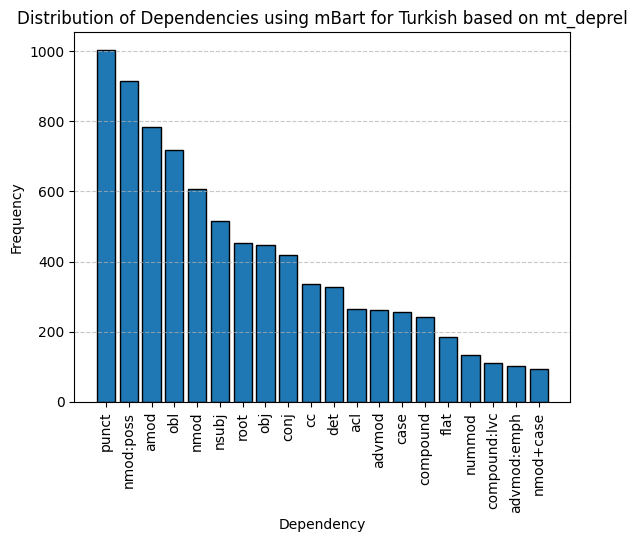

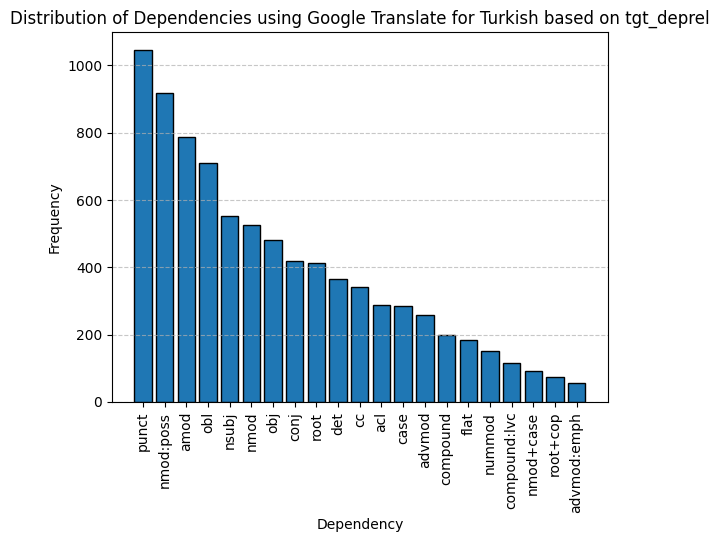

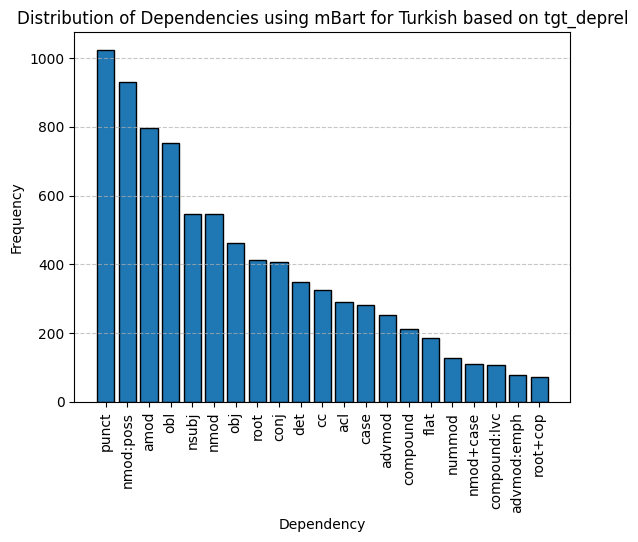

In [31]:
frequency_histogram_deprel(data_tur_pe1,'mt_deprel', 'Turkish', 'Google Translate')
frequency_histogram_deprel(data_tur_pe2,'mt_deprel', 'Turkish', 'mBart')
frequency_histogram_deprel(data_tur_pe1, 'tgt_deprel', 'Turkish', 'Google Translate')
frequency_histogram_deprel(data_tur_pe2, 'tgt_deprel', 'Turkish', 'mBart')

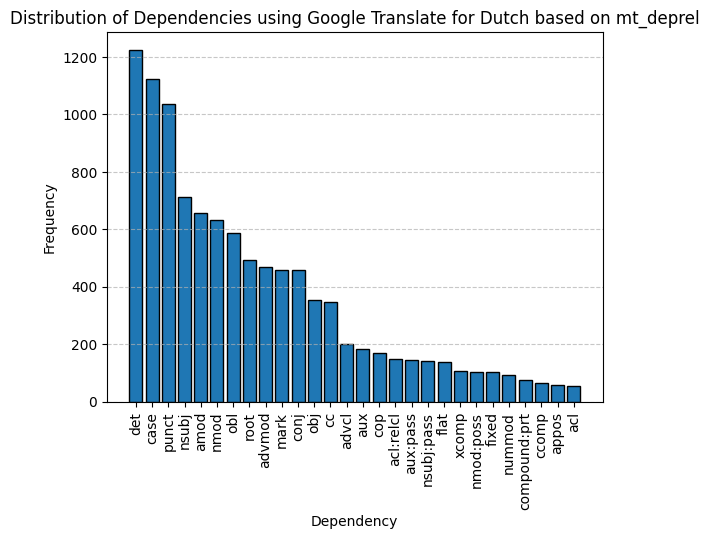

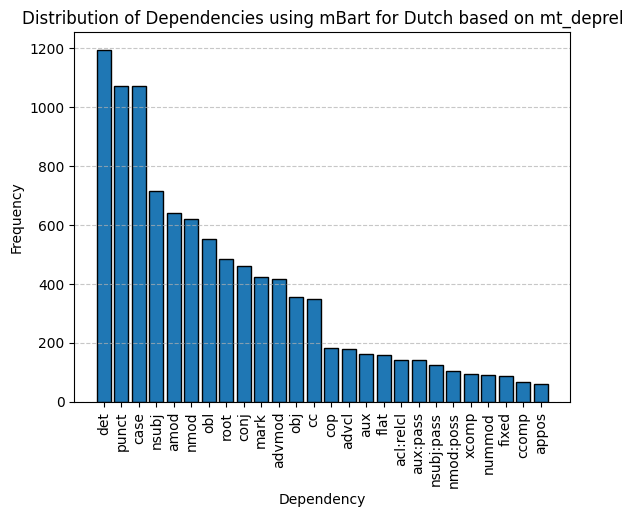

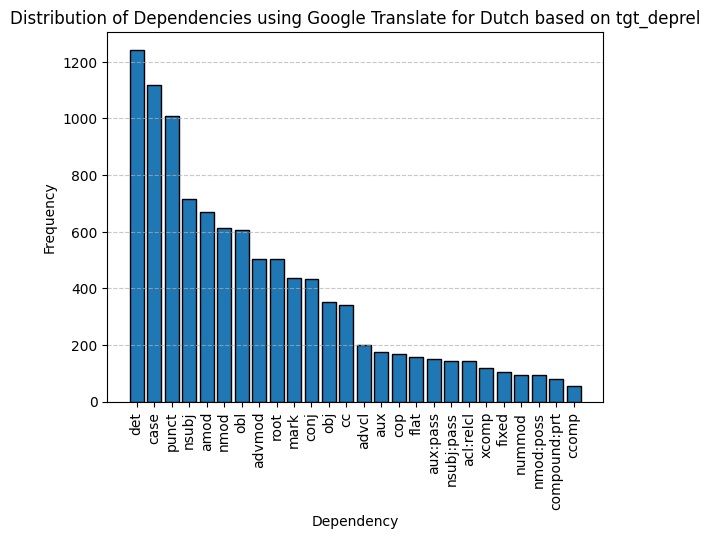

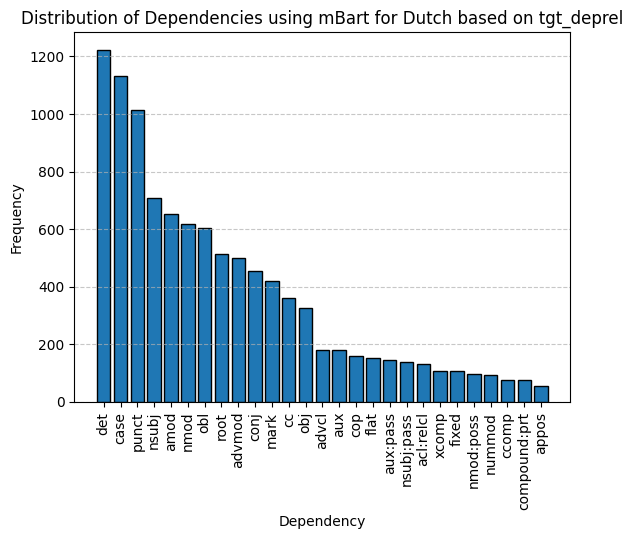

In [32]:
frequency_histogram_deprel(data_nld_pe1,'mt_deprel', 'Dutch', 'Google Translate')
frequency_histogram_deprel(data_nld_pe2,'mt_deprel', 'Dutch', 'mBart')
frequency_histogram_deprel(data_nld_pe1, 'tgt_deprel', 'Dutch', 'Google Translate')
frequency_histogram_deprel(data_nld_pe2, 'tgt_deprel', 'Dutch', 'mBart')

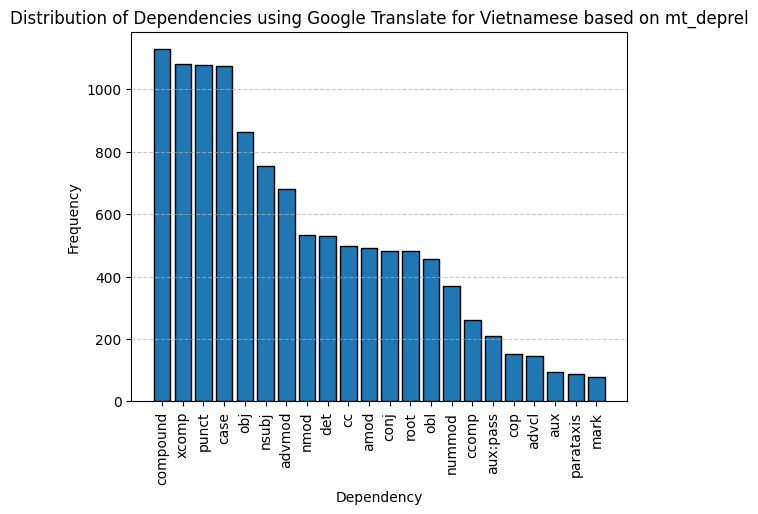

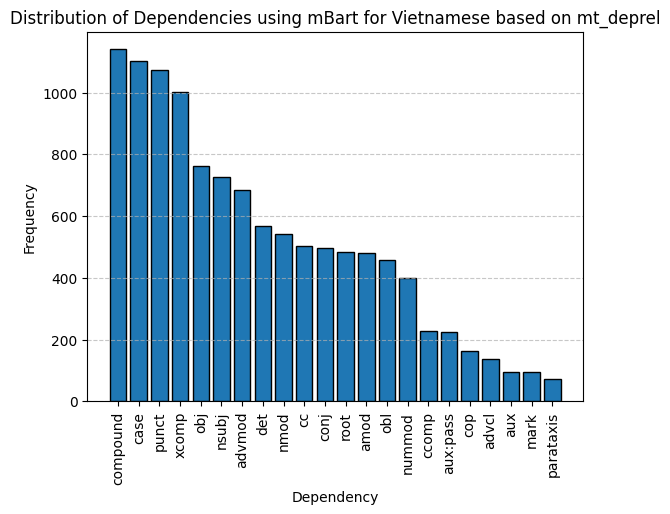

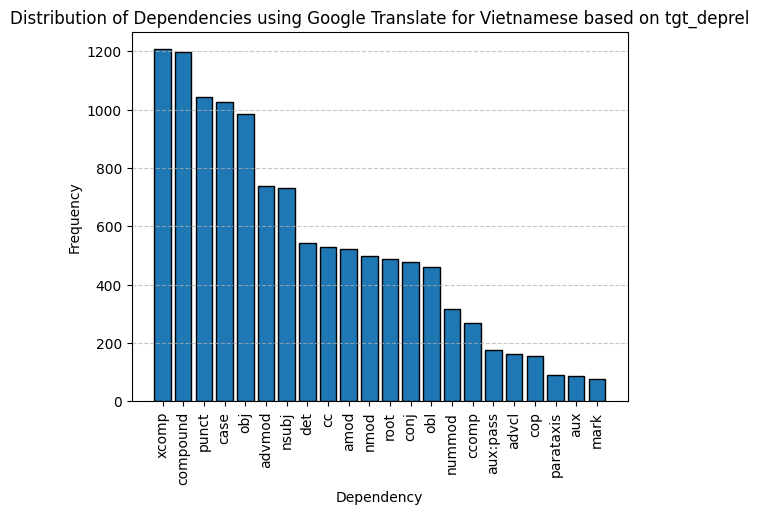

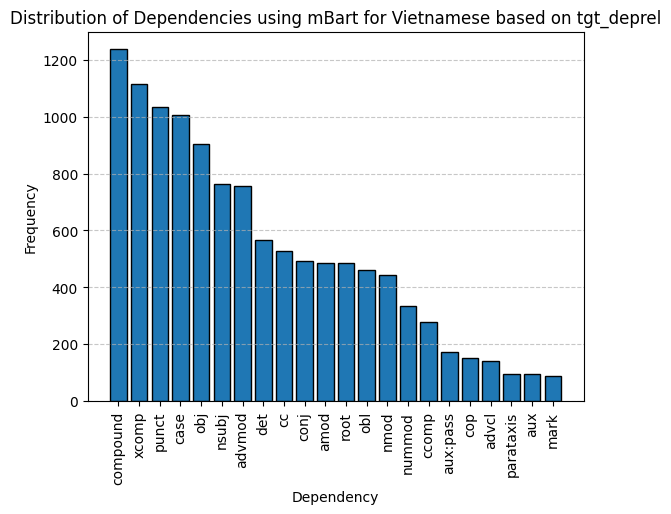

In [33]:
frequency_histogram_deprel(data_vie_pe1,'mt_deprel', 'Vietnamese', 'Google Translate')
frequency_histogram_deprel(data_vie_pe2,'mt_deprel', 'Vietnamese', 'mBart')
frequency_histogram_deprel(data_vie_pe1, 'tgt_deprel', 'Vietnamese', 'Google Translate')
frequency_histogram_deprel(data_vie_pe2, 'tgt_deprel', 'Vietnamese', 'mBart')

3) Correlate POS, NER, Dependencies and Tokens with the OK/BAD tags to find additional information. You can choose whatever field in combination with the tag field and correlate them using the **tags_histogram** function.

In [34]:
def tags_histogram(dataset, field_name, tag_field_name, tag):
    # Get the values from the specified fields
    token_tags = dataset[field_name]
    ok_bad_tags = dataset[tag_field_name]

    ok_bad_pos_counts = {}
    for token_list, tag_list in zip(token_tags, ok_bad_tags):
        for token, tag_value in zip(token_list, tag_list[:-1]):  # Exclude the last element from the tag list
            if tag_value == tag:
                if token in ok_bad_pos_counts:
                    ok_bad_pos_counts[token] += 1
                else:
                    ok_bad_pos_counts[token] = 1

    sorted_filtered_ok_bad_pos_counts = sorted(ok_bad_pos_counts.items(), key=lambda x: x[1], reverse=True)

    sorted_filtered_ok_bad_pos_counts = sorted_filtered_ok_bad_pos_counts[:20]

    # Generate the bar graph with ordered frequencies
    pos_ara = [pos for pos, count in sorted_filtered_ok_bad_pos_counts]
    ordered_frequencies = [count for pos, count in sorted_filtered_ok_bad_pos_counts]
    plt.bar(pos_ara, ordered_frequencies, edgecolor='black')
    plt.xlabel('Tokens')
    plt.ylabel(f'Frequency of {tag} Tags')
    plt.title(f'Distribution of {tag} tags based on {field_name} (Top 20)')
    plt.xticks(rotation=90)  # set rotation to 90 degrees

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

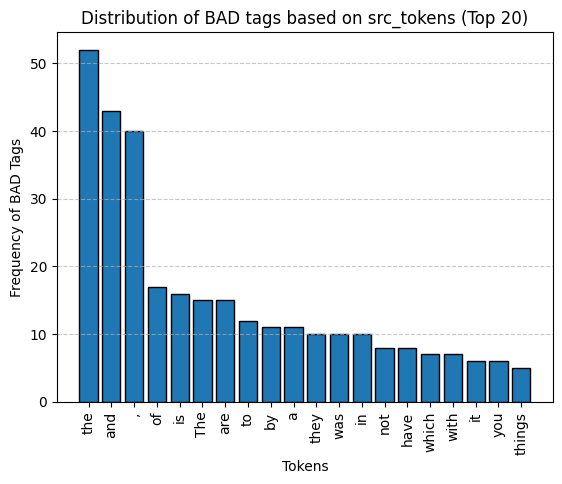

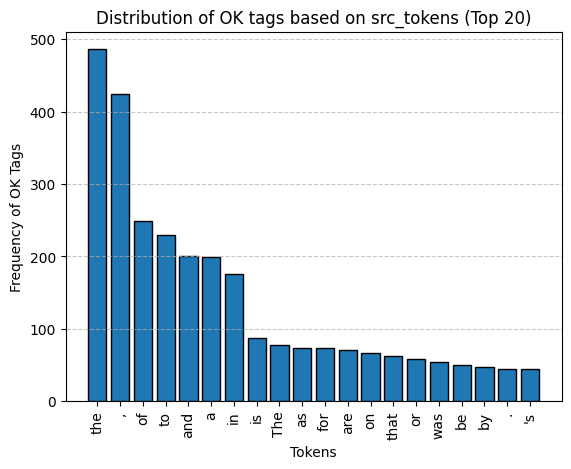

In [35]:
# Just for testing
tags_histogram(data_ara_pe1, 'src_tokens', 'src_wmt22_qe', 'BAD')
tags_histogram(data_ara_pe1, 'src_tokens', 'src_wmt22_qe', 'OK')

3*) The % of the distrubutions

In [36]:
def tags_histogram_percent(dataset, field_name, tag_field_name, tag):
    # Get the values from the specified fields
    token_tags = dataset[field_name]
    ok_bad_tags = dataset[tag_field_name]
    freq = {}

    ok_bad_pos_counts = {}
    for token_list, tag_list in zip(token_tags, ok_bad_tags):
        for token, tag_value in zip(token_list, tag_list[:-1]):  # Exclude the last element from the tag list
            if token in freq:
                freq[token] += 1
            else:
                freq[token] = 1

            if tag_value == tag:
                if token in ok_bad_pos_counts:
                    ok_bad_pos_counts[token] += 1
                else:
                    ok_bad_pos_counts[token] = 1
            
    
    for token in ok_bad_pos_counts:
      copy = ok_bad_pos_counts[token]
      ok_bad_pos_counts[token] = copy * 100 / freq[token]

    sorted_filtered_ok_bad_pos_counts = sorted(ok_bad_pos_counts.items(), key=lambda x: x[1], reverse=True)

    sorted_filtered_ok_bad_pos_counts = sorted_filtered_ok_bad_pos_counts[:20]

    # Generate the bar graph with ordered frequencies
    pos_ara = [pos for pos, count in sorted_filtered_ok_bad_pos_counts]
    ordered_frequencies = [count for pos, count in sorted_filtered_ok_bad_pos_counts]
    plt.bar(pos_ara, ordered_frequencies, edgecolor='black')
    plt.xlabel('Tokens')
    plt.ylabel(f'Percentage  of {tag} Tags')
    plt.title(f'Distribution of {tag} tags based on {field_name} in percentage')
    plt.xticks(rotation=90)  # set rotation to 90 degrees

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

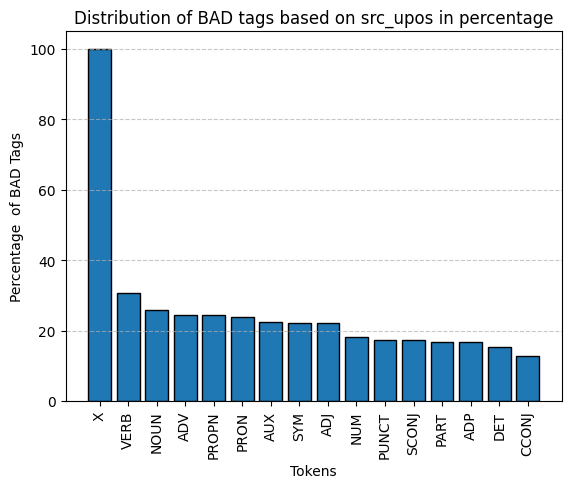

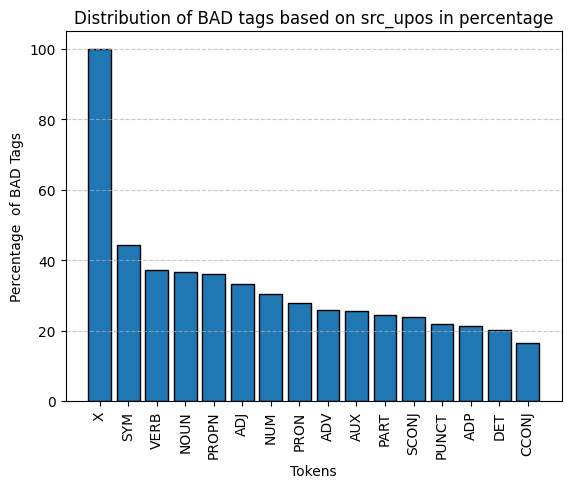

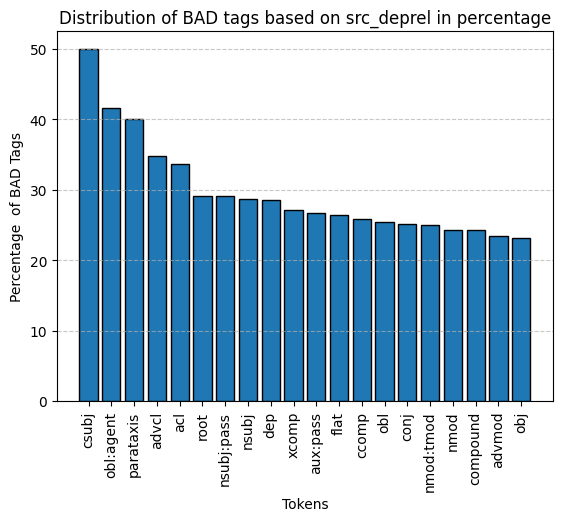

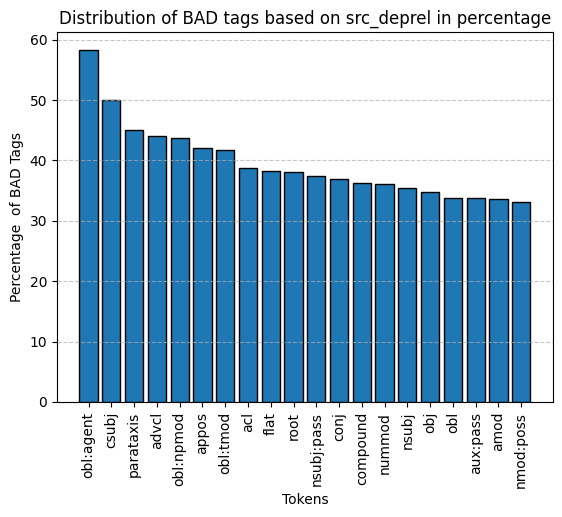

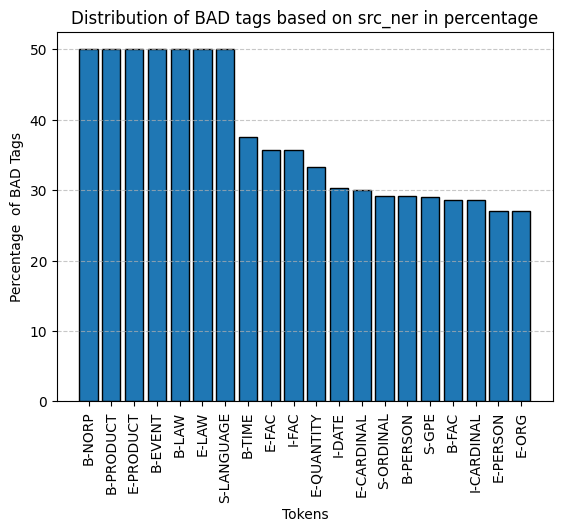

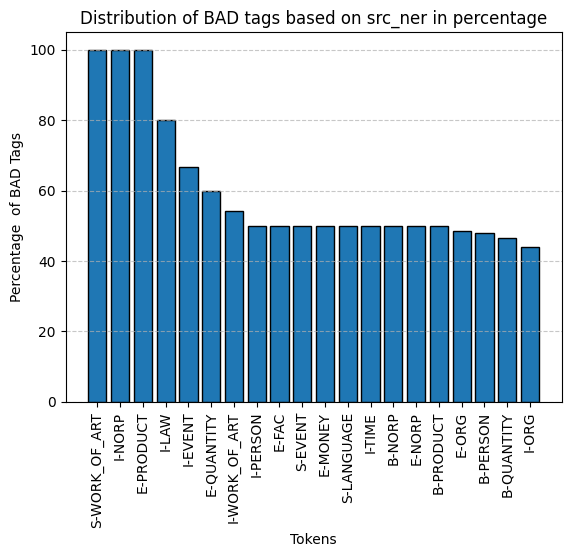

In [37]:
# For Vietnamsese
tags_histogram_percent(data_vie_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_vie_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_vie_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_vie_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_vie_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_vie_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')

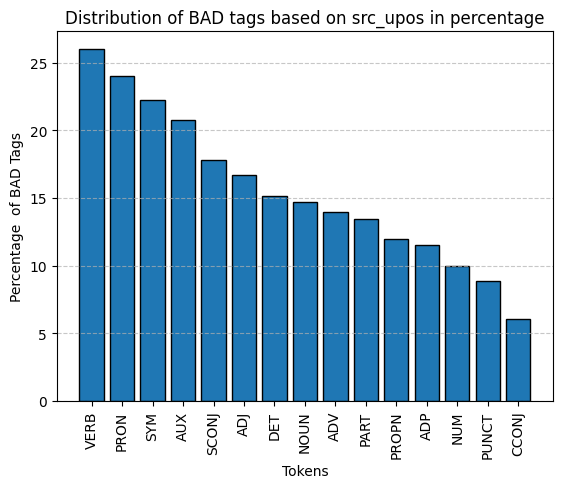

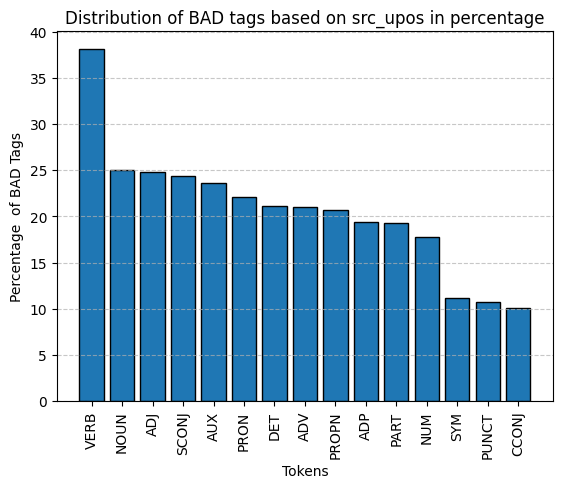

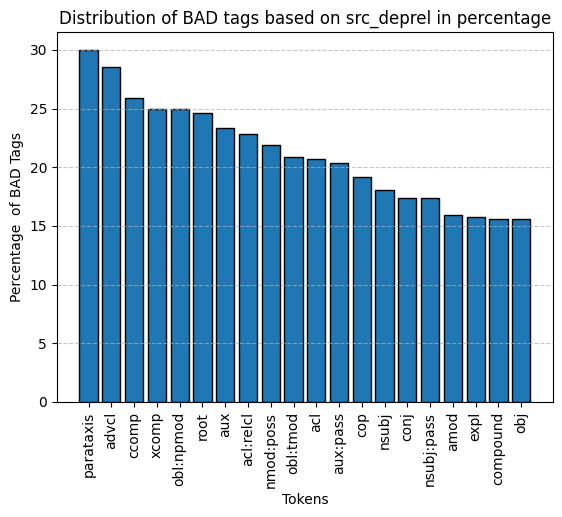

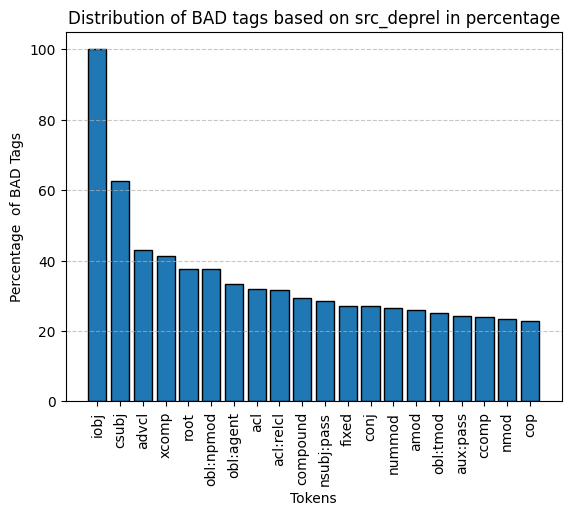

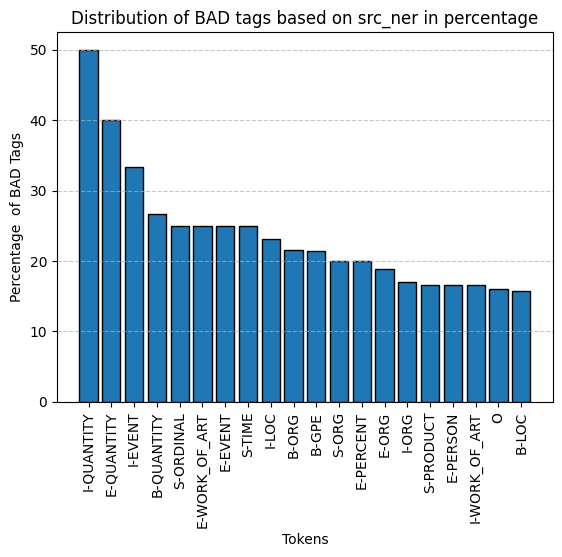

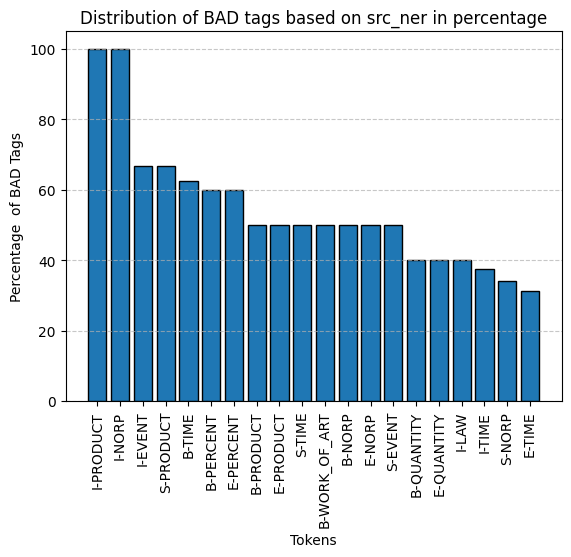

In [38]:
# For Italian
tags_histogram_percent(data_ita_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ita_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_ita_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ita_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_ita_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ita_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')

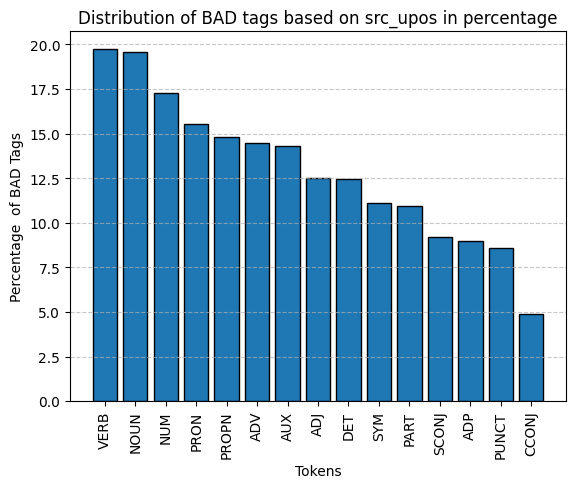

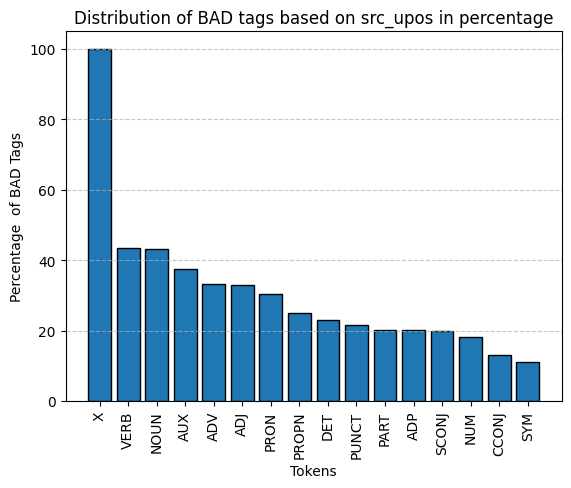

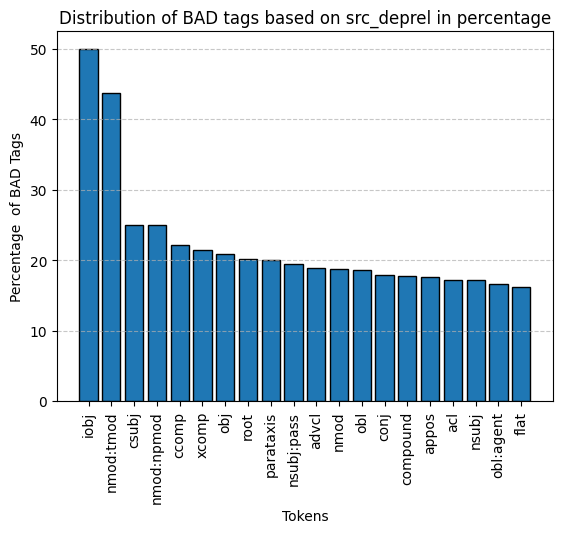

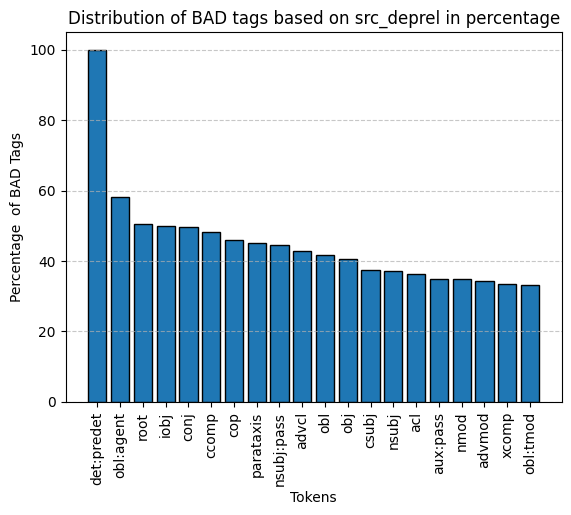

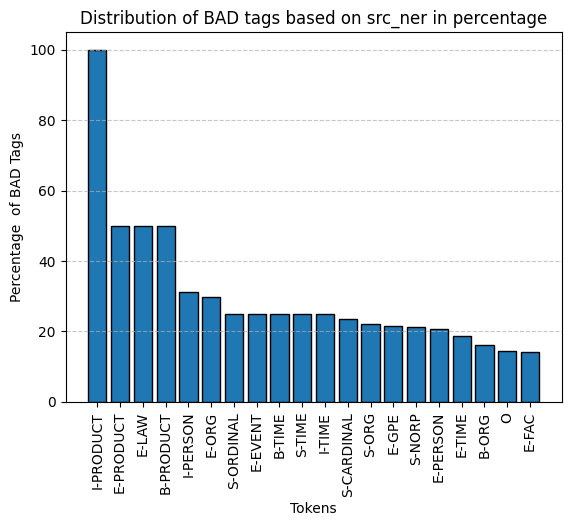

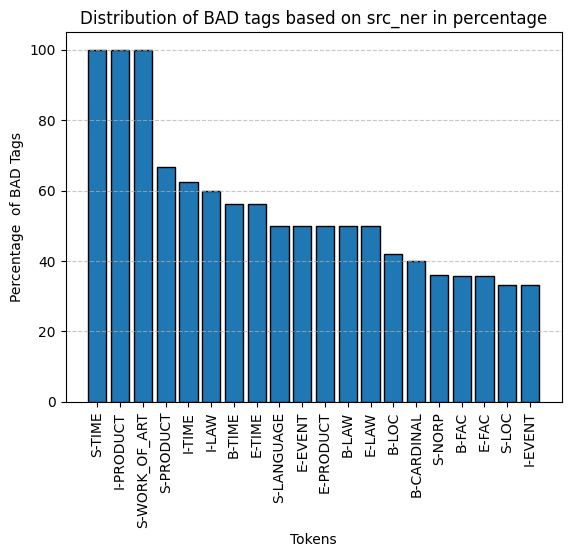

In [39]:
# For Turkish
tags_histogram_percent(data_tur_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_tur_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_tur_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_tur_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_tur_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_tur_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')

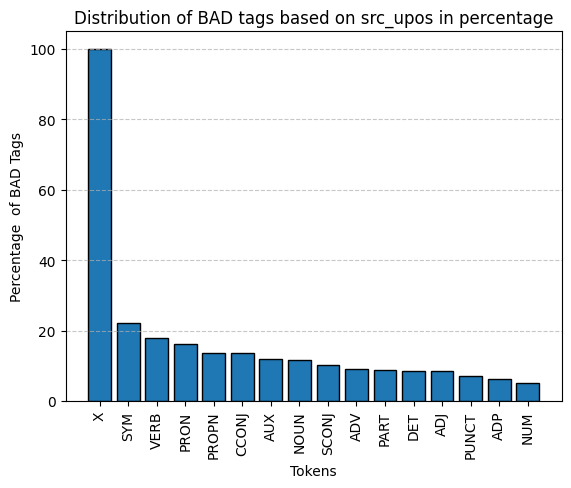

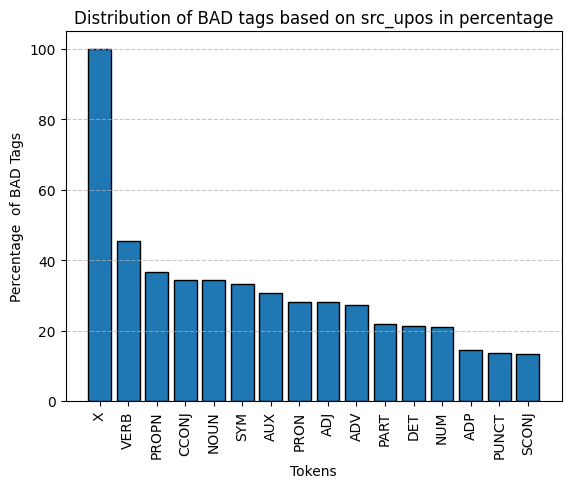

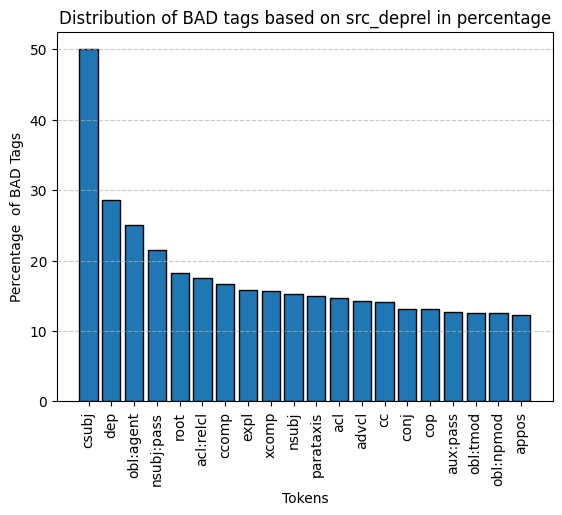

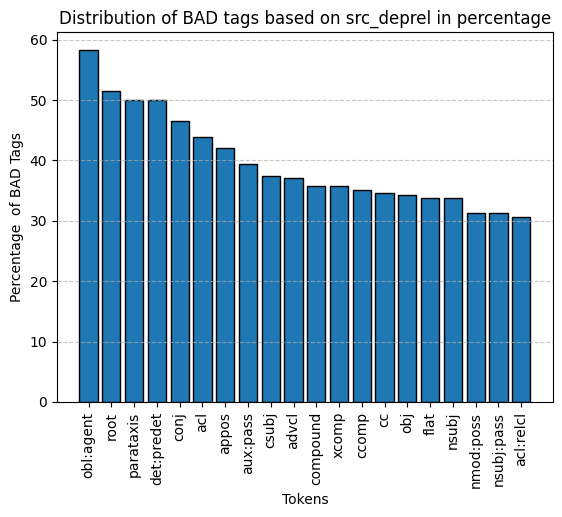

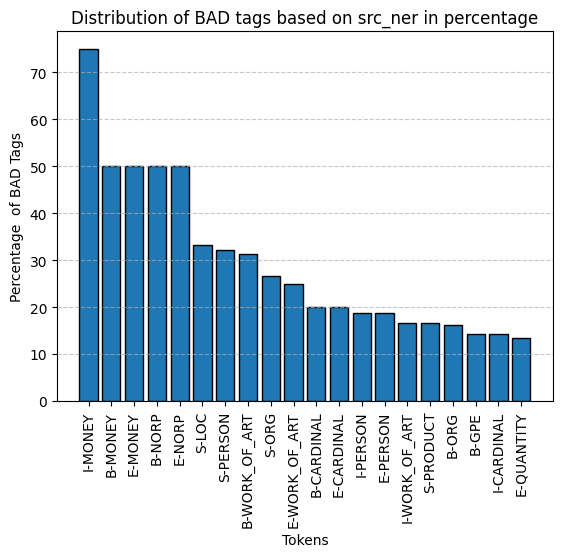

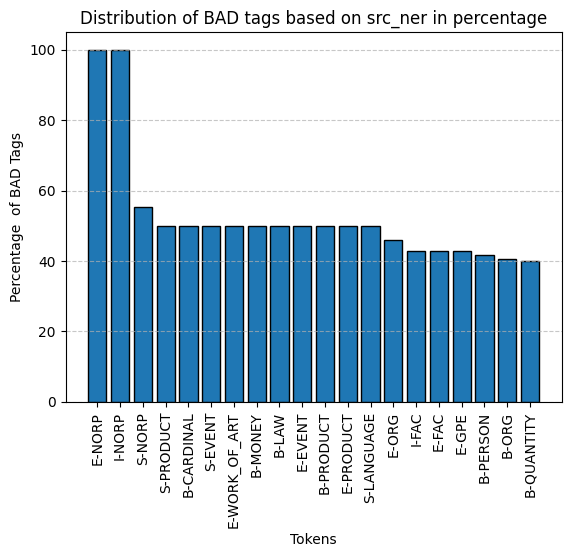

In [40]:
# For Arabic
tags_histogram_percent(data_ara_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ara_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_ara_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ara_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_ara_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ara_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')

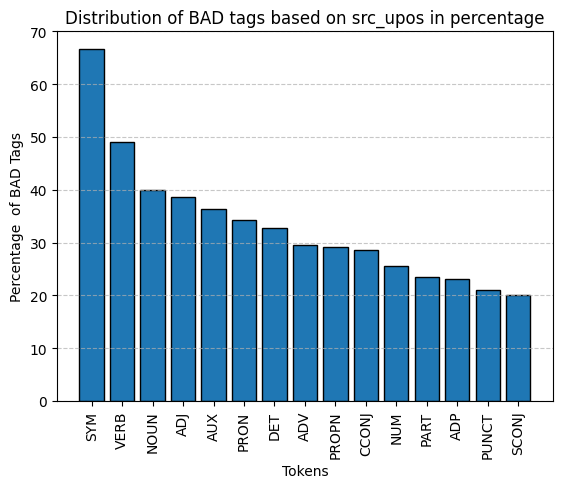

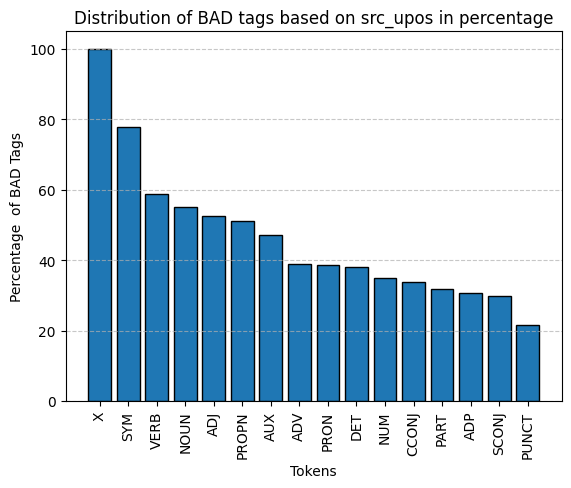

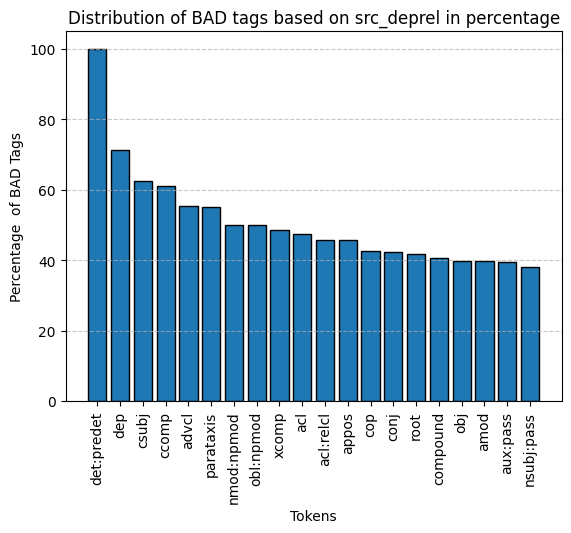

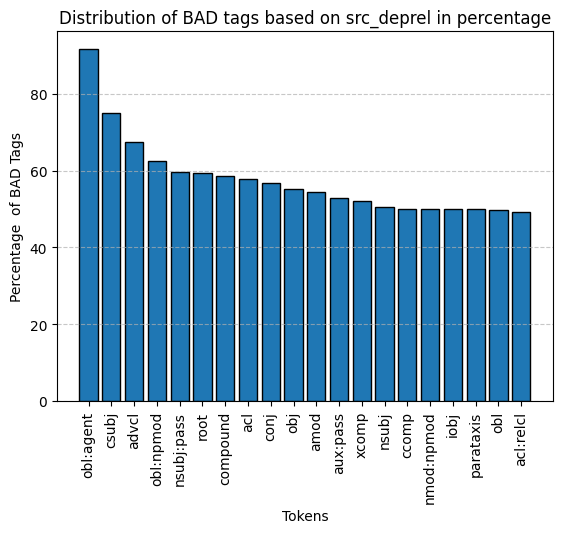

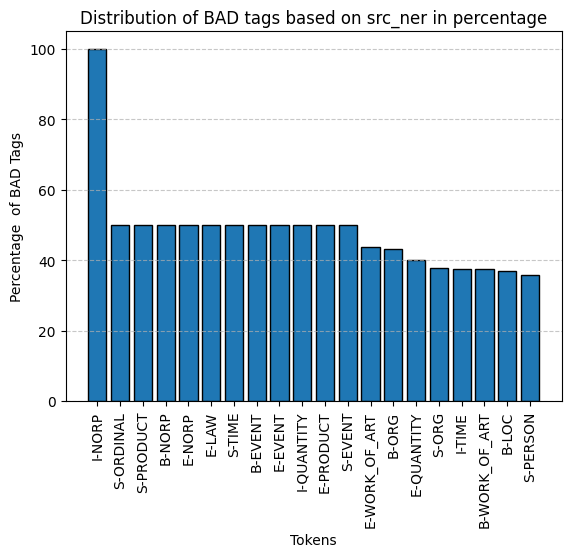

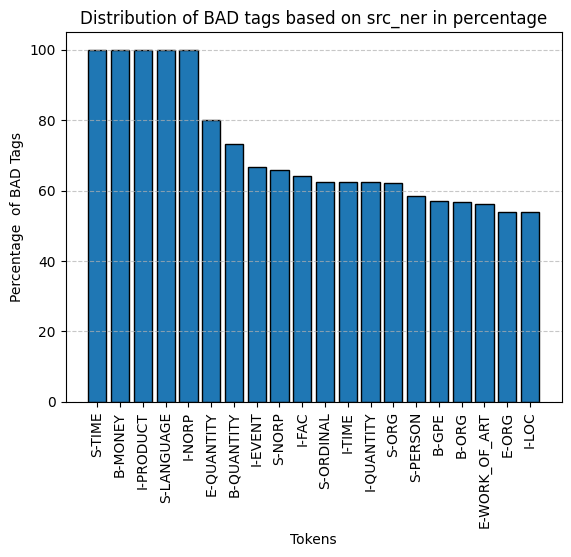

In [41]:
# For Ukrainian
tags_histogram_percent(data_ukr_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ukr_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_ukr_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ukr_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_ukr_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_ukr_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')

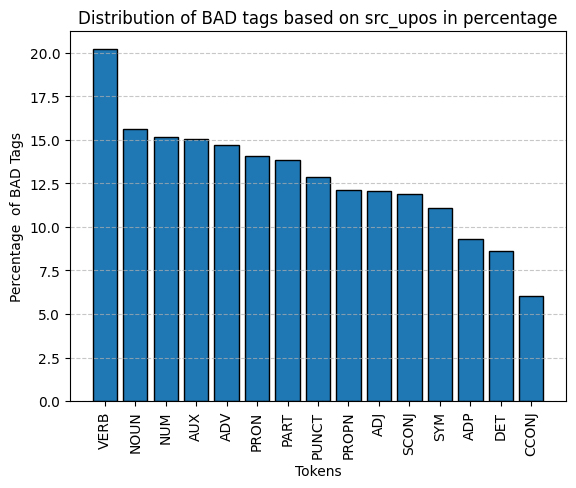

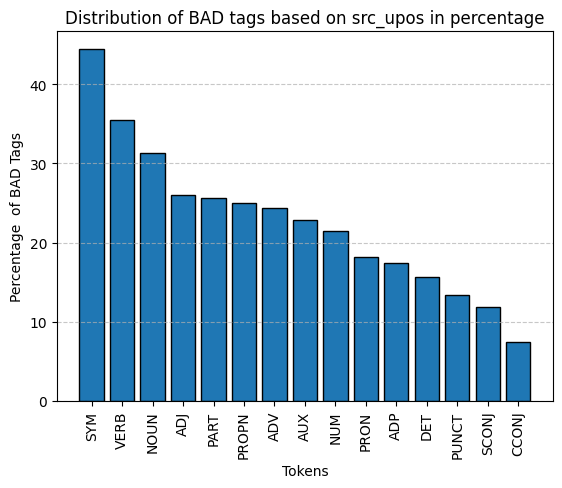

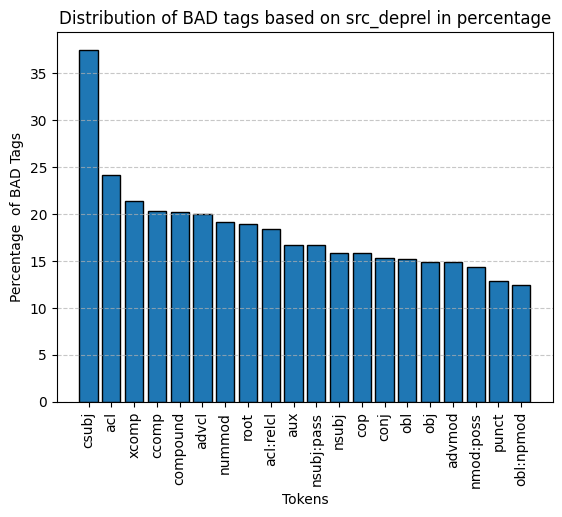

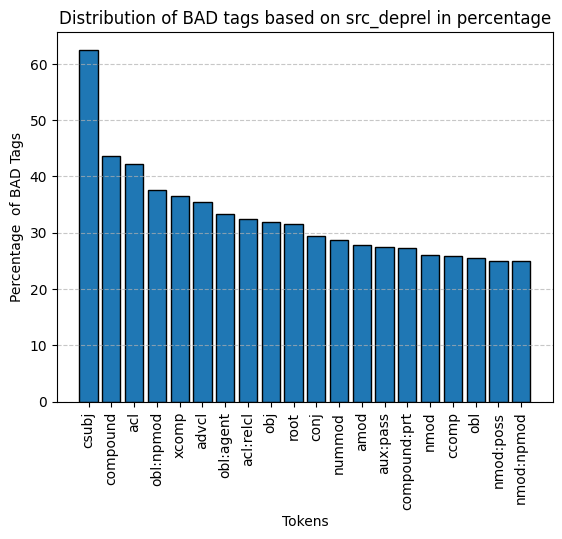

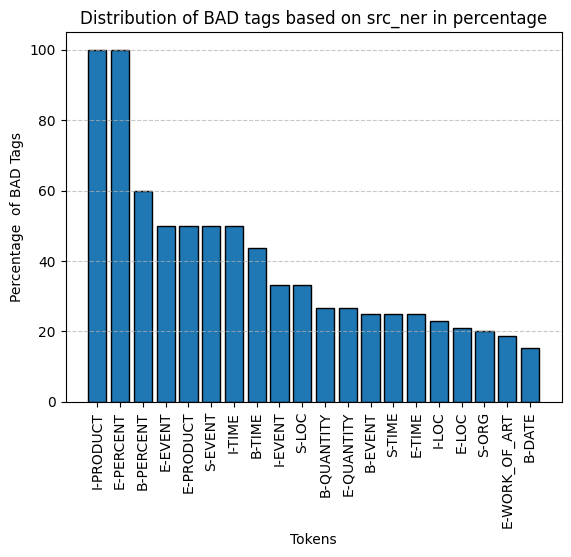

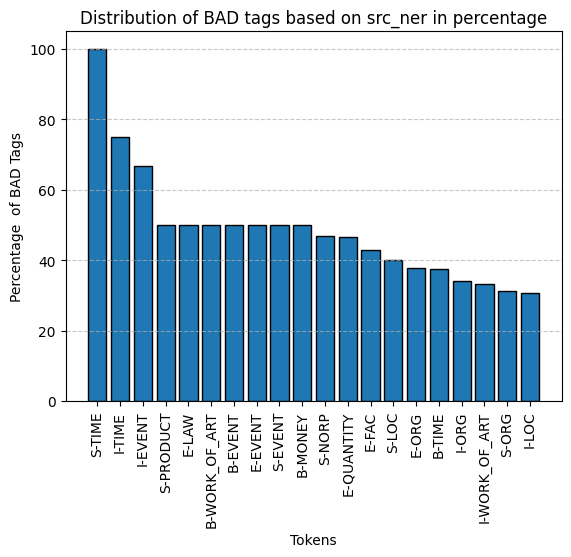

In [42]:
# For Dutch
tags_histogram_percent(data_nld_pe1, 'src_upos', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_nld_pe2, 'src_upos', 'src_wmt22_qe', 'BAD')


tags_histogram_percent(data_nld_pe1, 'src_deprel', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_nld_pe2, 'src_deprel', 'src_wmt22_qe', 'BAD')

tags_histogram_percent(data_nld_pe1, 'src_ner', 'src_wmt22_qe', 'BAD')
tags_histogram_percent(data_nld_pe2, 'src_ner', 'src_wmt22_qe', 'BAD')